### Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Model -- model of the car

Price  -- Offer Price in EUROs

Age_08_04 -- Age in months as in August 2004

Mfg_Month -- Manufacturing month (1-12)

Mfg_Year	-- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color	 -- Metallic Color?  (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic	-- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders	-- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

Guarantee_Period -- 	Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

Airco -- Airconditioning  (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

Boardcomputer -- Boardcomputer  (Yes=1, No=0)

CD_Player -- CD Player  (Yes=1, No=0)

Central_Lock -- Central Lock  (Yes=1, No=0)

Powered_Windows -- Powered Windows  (Yes=1, No=0)

Power_Steering -- Power Steering  (Yes=1, No=0)

Radio -- Radio  (Yes=1, No=0)

Mistlamps	-- Mistlamps  (Yes=1, No=0)

Sport_Model -- Sport Model  (Yes=1, No=0)

Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

Metallic_Rim --Metallic Rim  (Yes=1, No=0)

Radio_cassette -- Radio Cassette  (Yes=1, No=0)

Tow_Bar -- Tow Bar  (Yes=1, No=0)



Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [4]:
import pandas as pd

# Assuming "ToyotaCorolla.csv" is the name of your CSV file
ToyotaCorolla= pd.read_csv("ToyotaCorolla.csv", encoding='latin1')

# Now you can work with the 'Corolla' object
ToyotaCorolla


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
ToyotaCorolla.shape

(1436, 38)

In [139]:
data=ToyotaCorolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
data[data.values==0.0]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [10]:
data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

<Axes: >

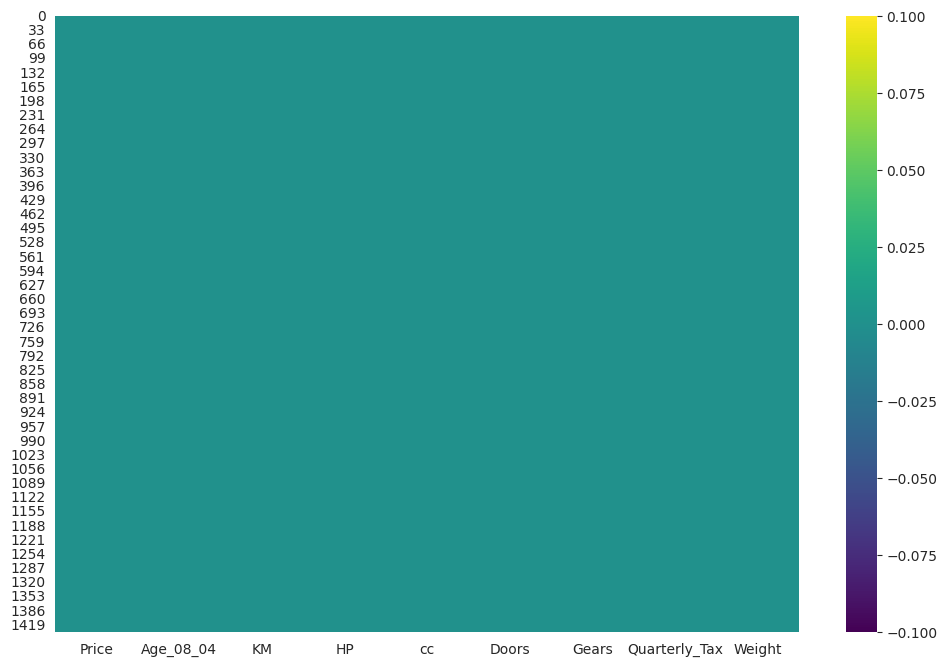

In [171]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='viridis')

In [172]:
data.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73])

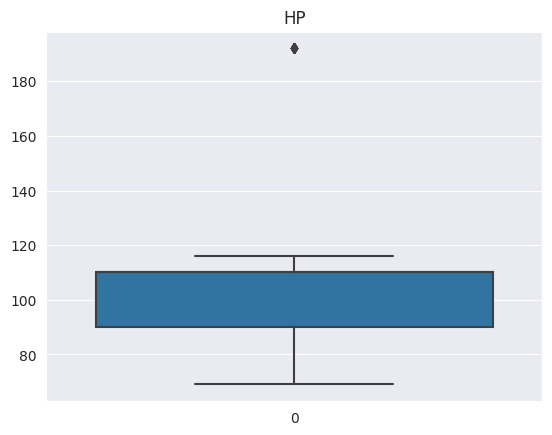

In [173]:
sns.boxplot(data['HP'])
plt.title('HP')
plt.show()

<Axes: >

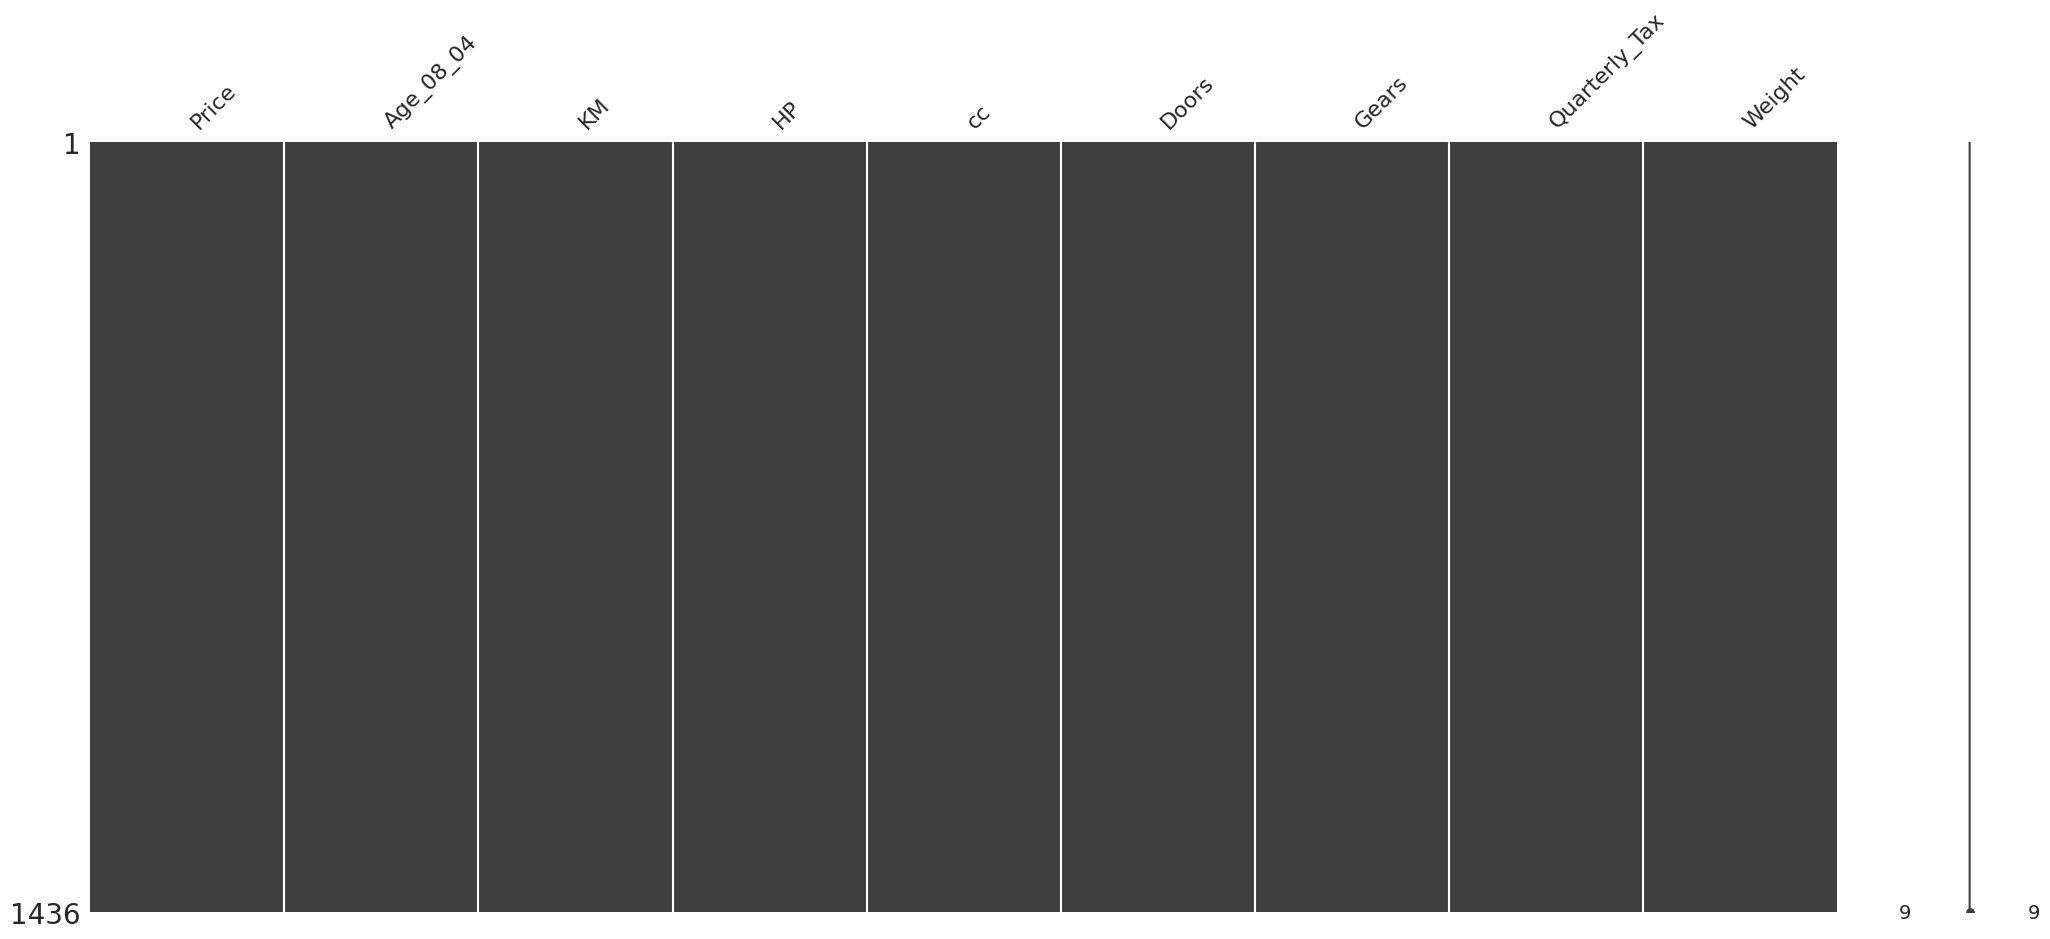

In [174]:
mn.matrix(data)

In [175]:

data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables

In [12]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [13]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


# Exploratory Data Anlaysis

Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [14]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

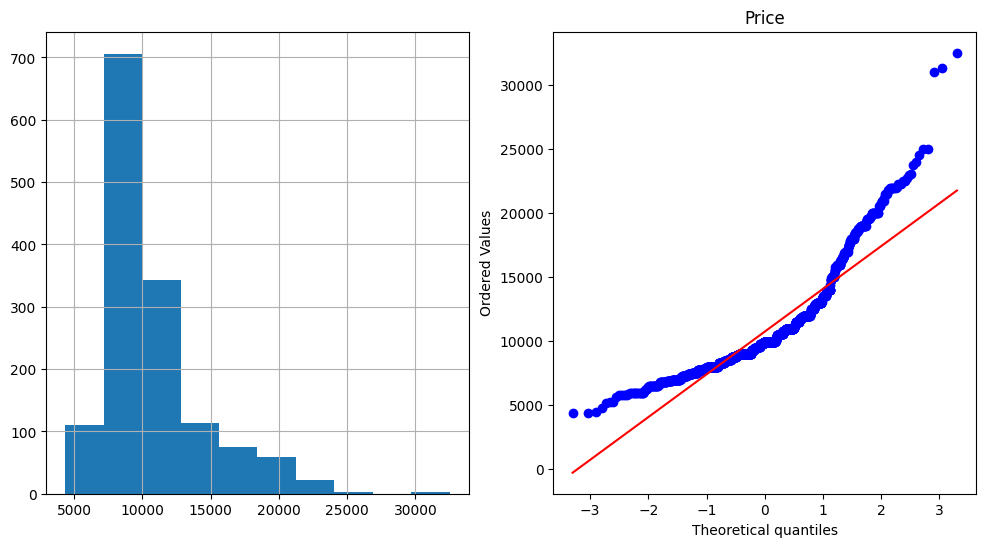

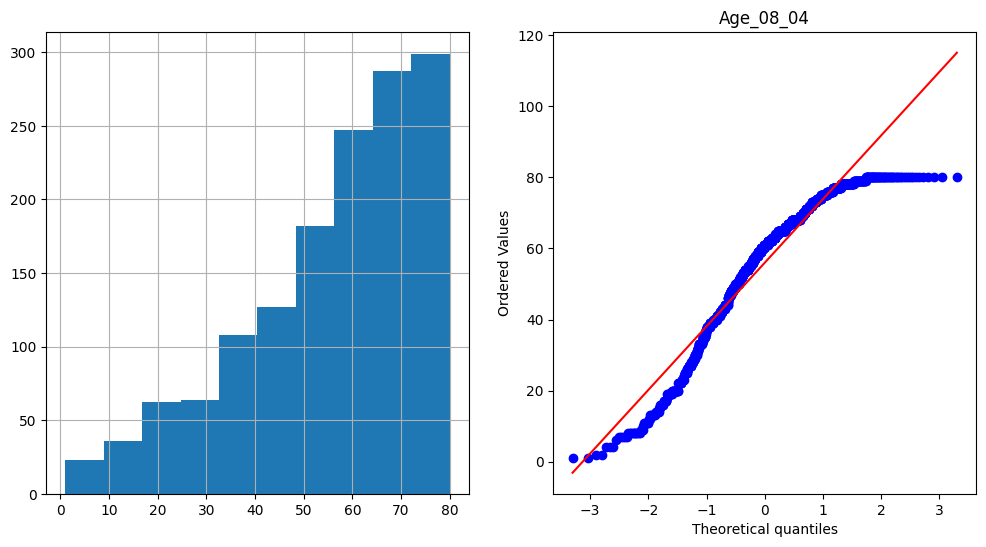

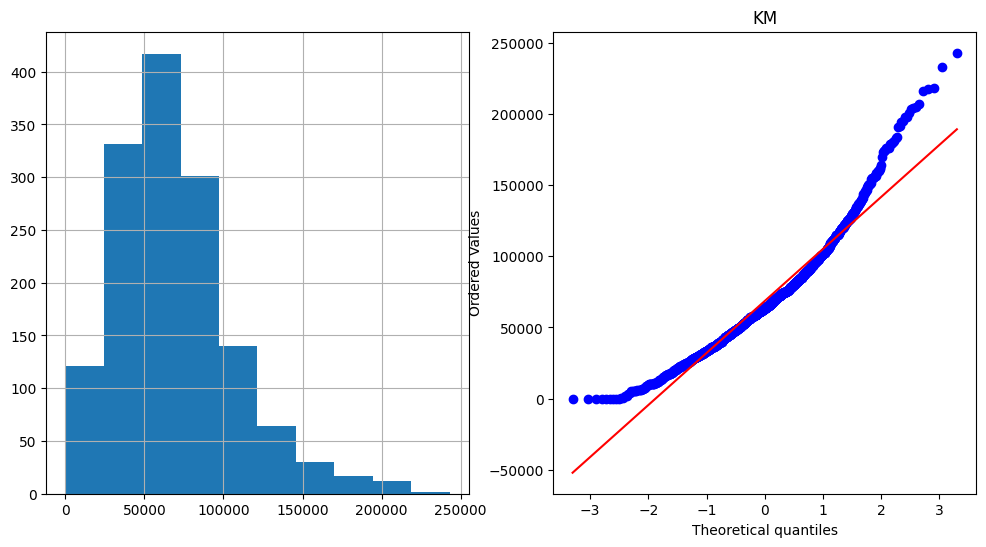

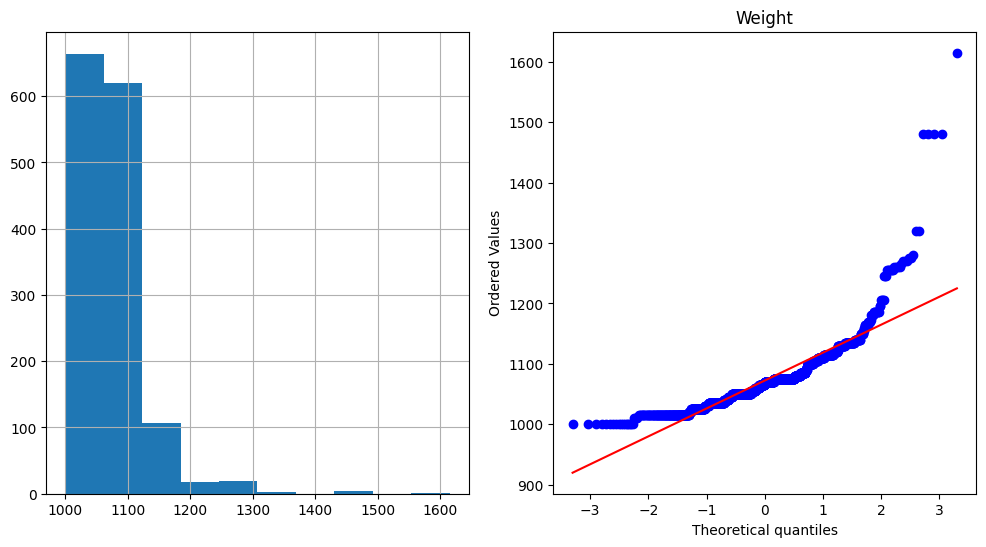

In [15]:
plot_data(data,'Price')
plt.title('Price')
plot_data(data,'Age_08_04')
plt.title('Age_08_04')
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title('Weight')

**The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.**

In [16]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [17]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature',shapiro(data.Price),'\n'
     'Age_08_04 feature',shapiro(data.Age_08_04),'\n'
     'Weight feature',shapiro(data.Weight),'\n'
     'KM feature',shapiro(data.KM))

Price feature ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age_08_04 feature ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


**Visualizing the Relation between each independent Feature with respect to the Dependent Feature**

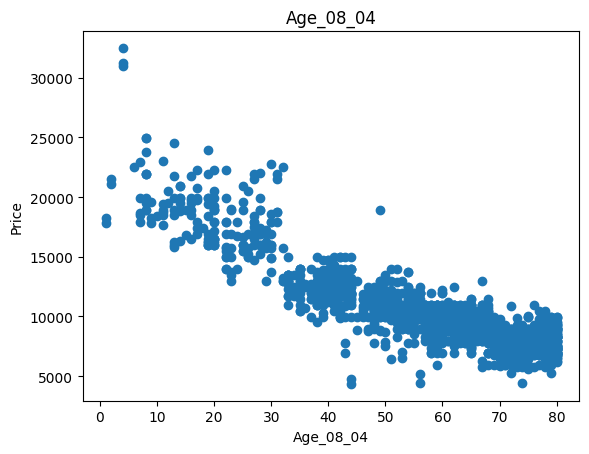

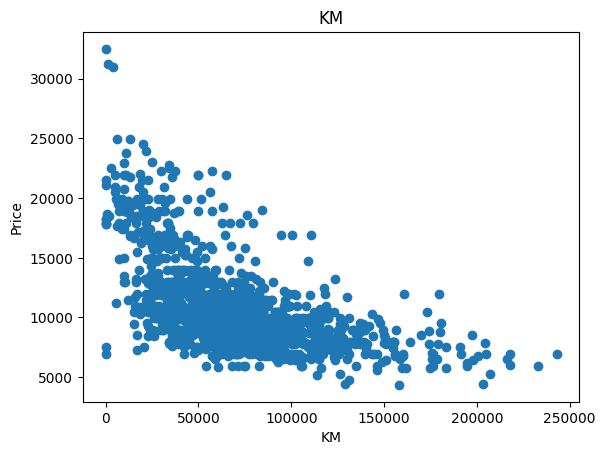

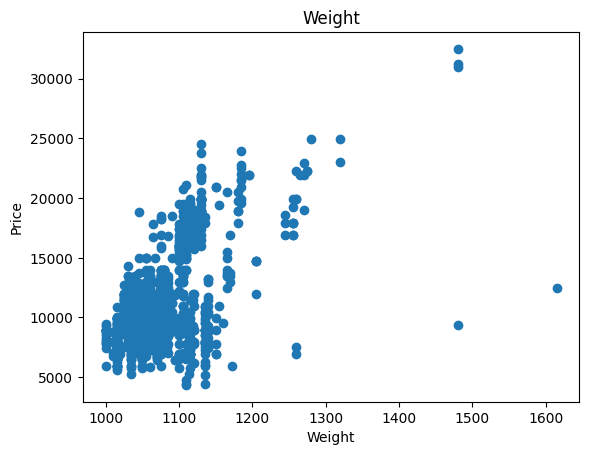

In [18]:
for feature in continuous_feature:
    if feature!="Price":
        df=data.copy()
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

Age feature has a good linear relation with Price a Negative Correlation as compare to other features

**Relationship between the discrete variables and Price**

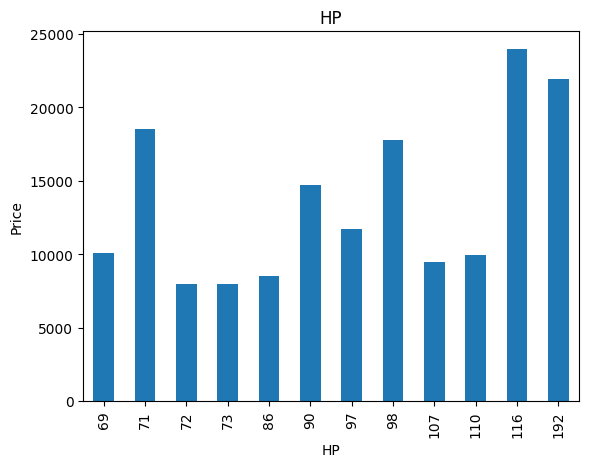

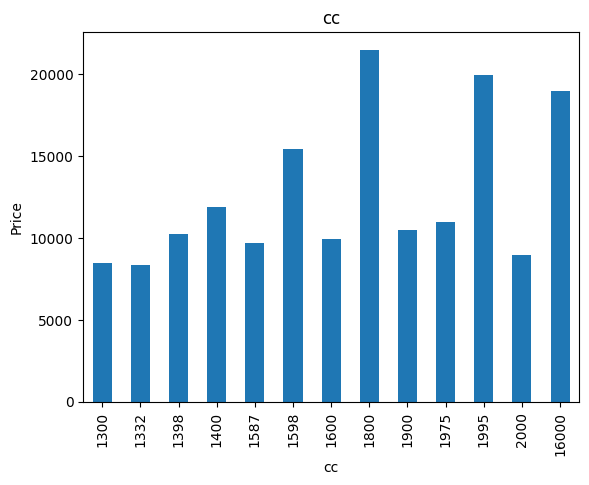

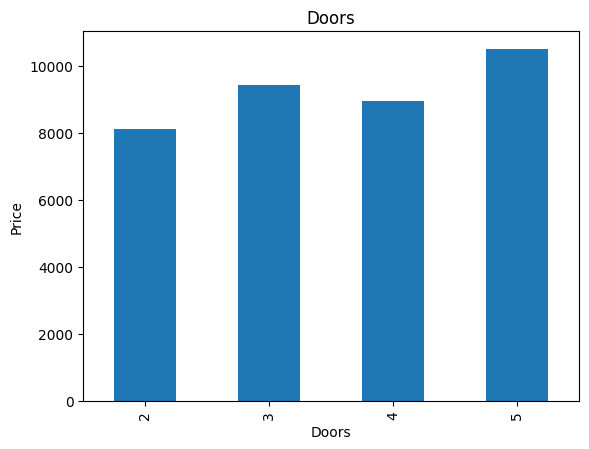

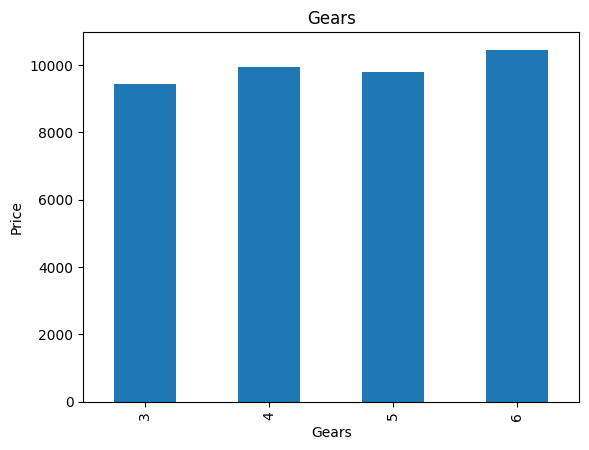

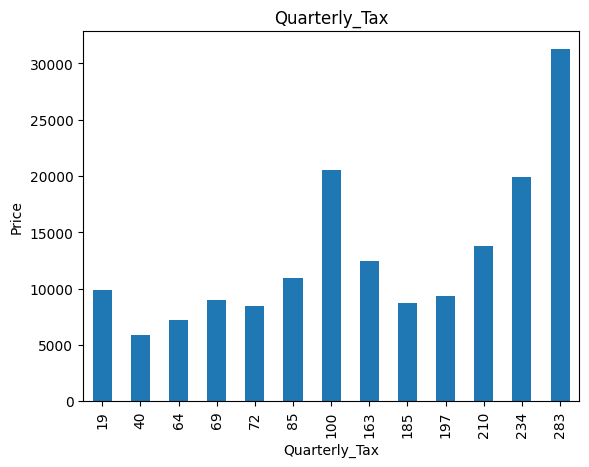

In [19]:
for feature in discrete_feature:
    df=data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

There is'nt much of difference between how much Gears and Doors each Car has to have a sginificant amount of changes in Prices from each other and there is'nt any direct relation

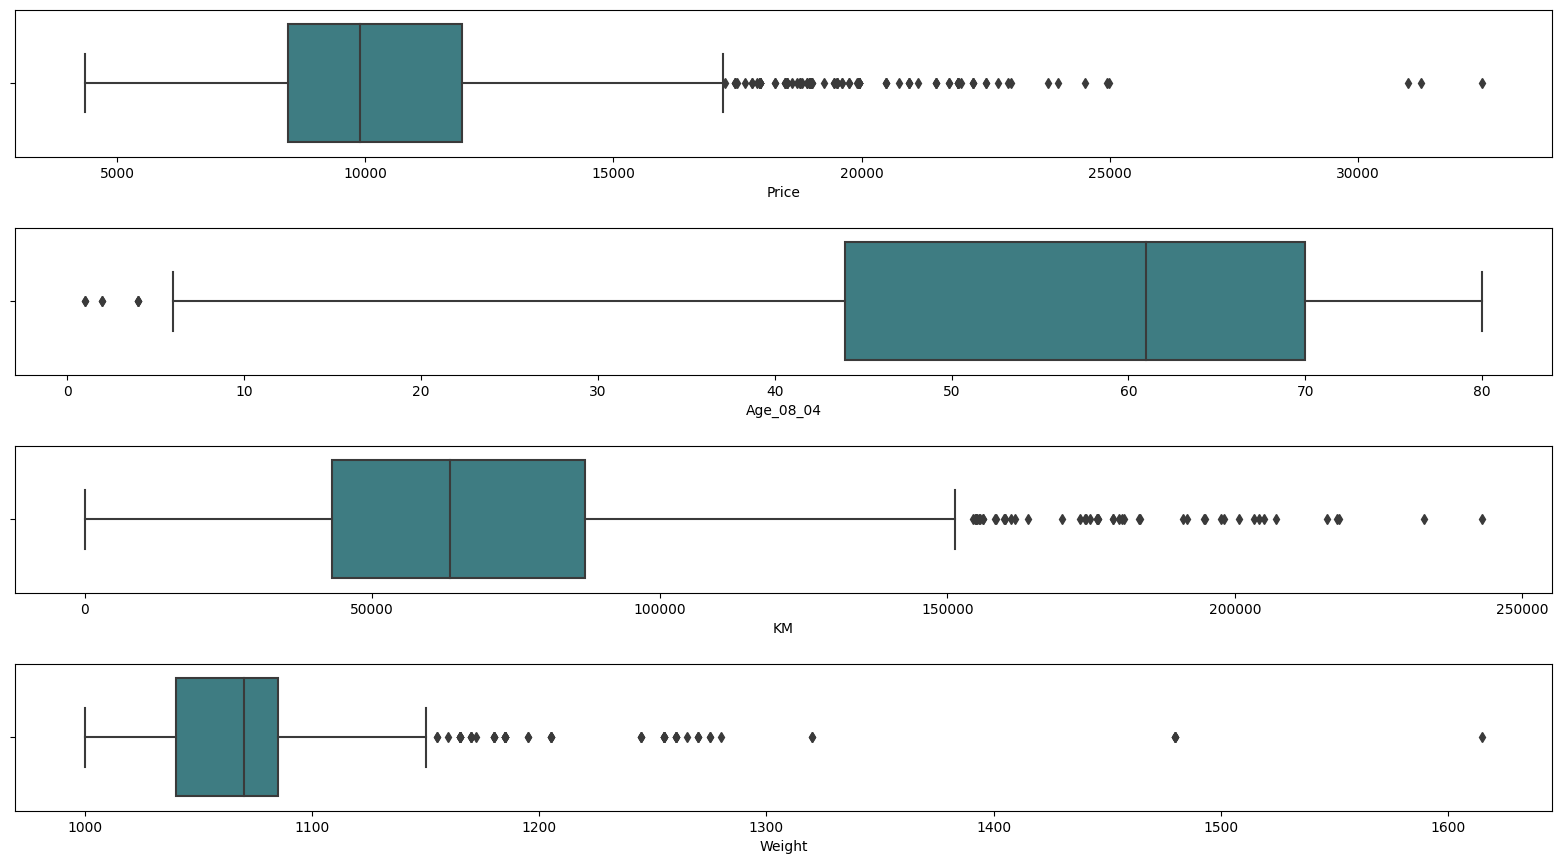

In [20]:
df=data.copy()
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age_08_04',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

A significant amount of outliers are present in each continuous feature

Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case

### Median Imputation to handle Outlier in Profit

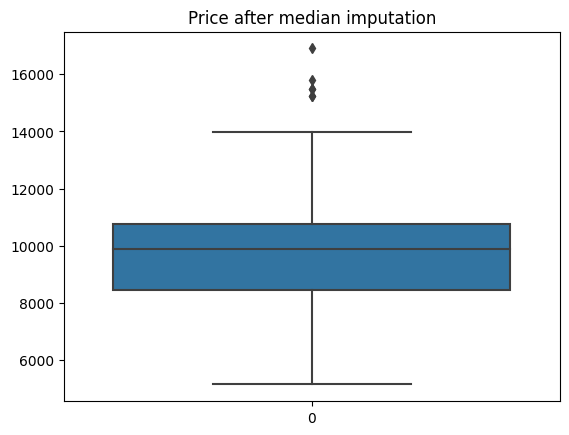

In [21]:
df1=data.copy()
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

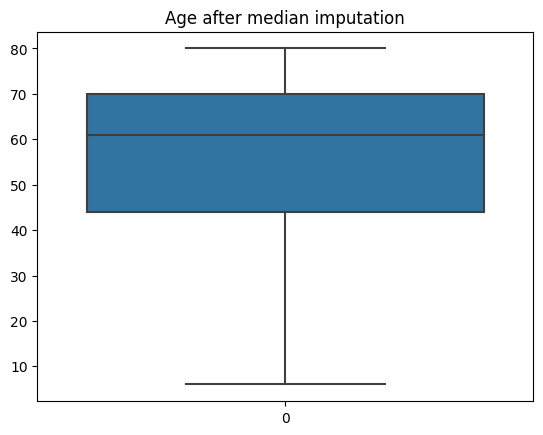

In [22]:
for i in data['Age_08_04']:
    q1 = np.quantile(df1.Age_08_04,0.25)
    q3 = np.quantile(df1.Age_08_04,0.75)
    med = np.median(df1.Age_08_04)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age_08_04'] = df1['Age_08_04'].replace(i, np.median(df1['Age_08_04']))
sns.boxplot(df1['Age_08_04'])
plt.title('Age after median imputation')
plt.show()

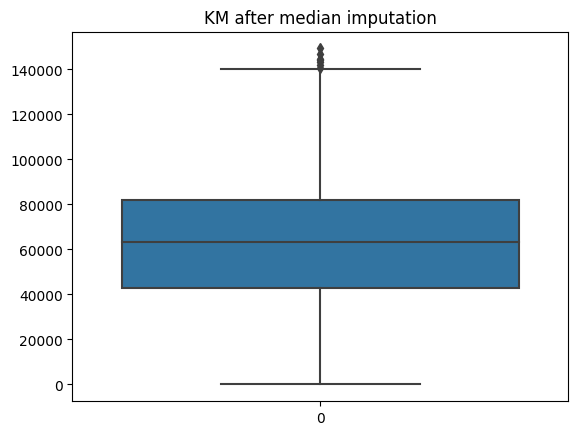

In [23]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

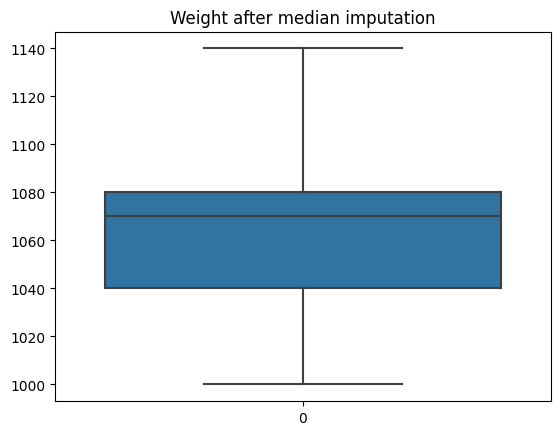

In [24]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

Test our data in model and find the R-squared with median imputation data model

In [25]:
after_median_imputation_model = smf.ols("Price~Age_08_04+KM+Weight", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj

(0.34204996085646155, 0.3406706106695778)

### Mean Imputation to handle Outlier in Profit

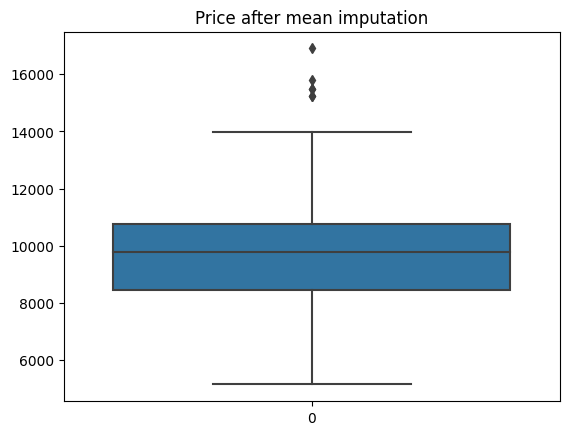

In [26]:
df2=data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()

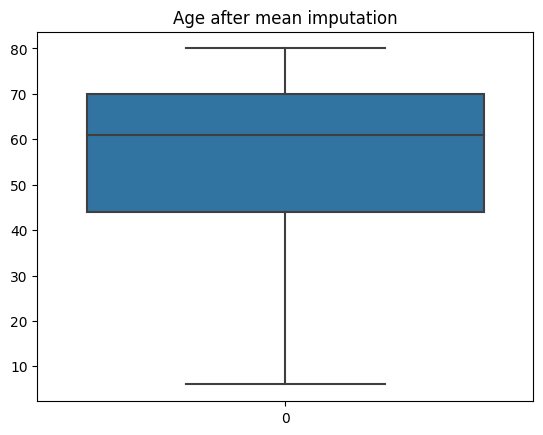

In [27]:
for i in data['Age_08_04']:
    q1 = np.quantile(df2.Age_08_04,0.25)
    q3 = np.quantile(df2.Age_08_04,0.75)
    med = np.median(df2.Age_08_04)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age_08_04'] = df2['Age_08_04'].replace(i, np.mean(df2['Age_08_04']))
sns.boxplot(df2['Age_08_04'])
plt.title('Age after mean imputation')
plt.show()

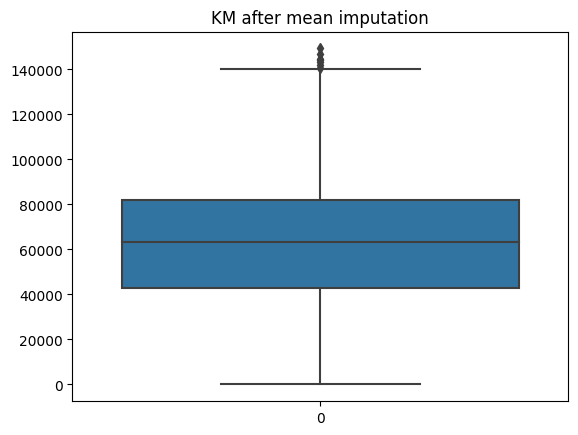

In [28]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

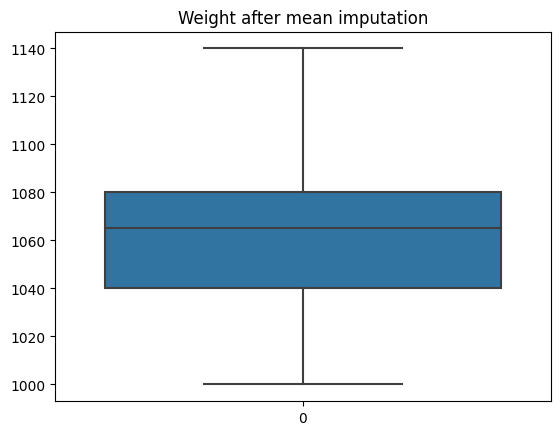

In [29]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

Test our data in model and find the R-squared with mean imputation data model

In [30]:
after_mean_imputation_model = smf.ols("Price~Age_08_04+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj

(0.3879621958171299, 0.3866790976951533)

After mean imputation the model is not performing well

## Removeing outliers

In [31]:
df3=data.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

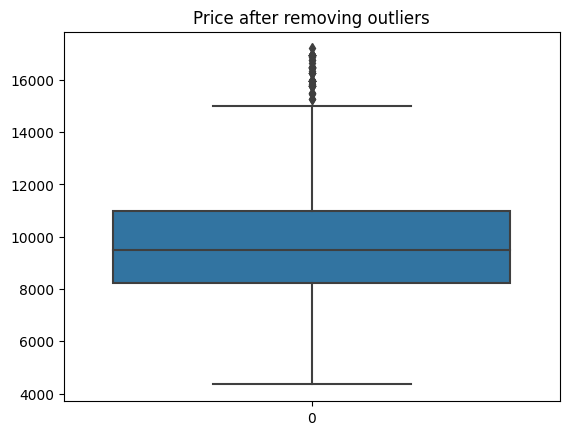

In [32]:
drop_outliers(df3, 'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'Age after removing outliers')

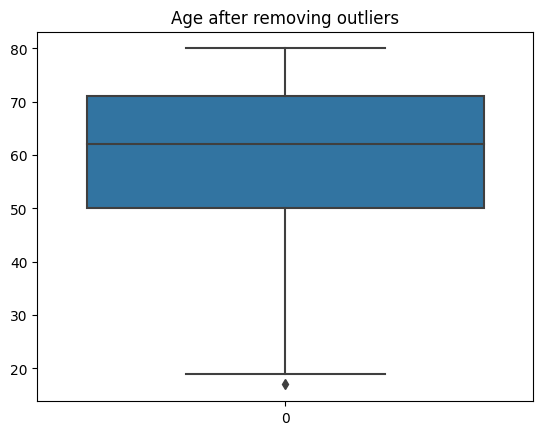

In [33]:
drop_outliers(df3, 'Age_08_04')
sns.boxplot(df3.Age_08_04)
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

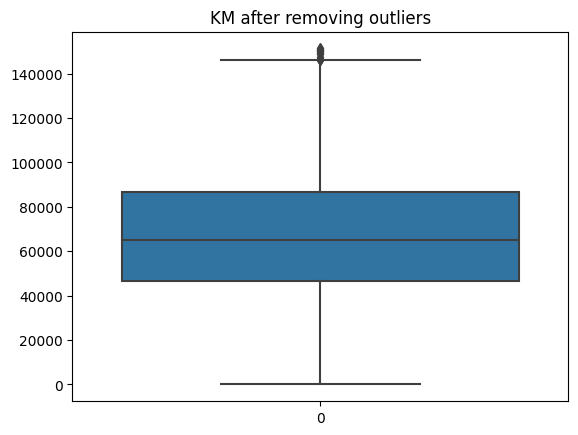

In [34]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers')

 Test our data in model and compare the R-squared with without imputation data model

In [178]:
removed_outlier_model = smf.ols("Price~Age_08_04+KM+Weight", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.7776886294411589, 0.7771455234870249)

In [179]:
np.sqrt(removed_outlier_model.mse_resid)

1060.0301342603996

### Log transformation  




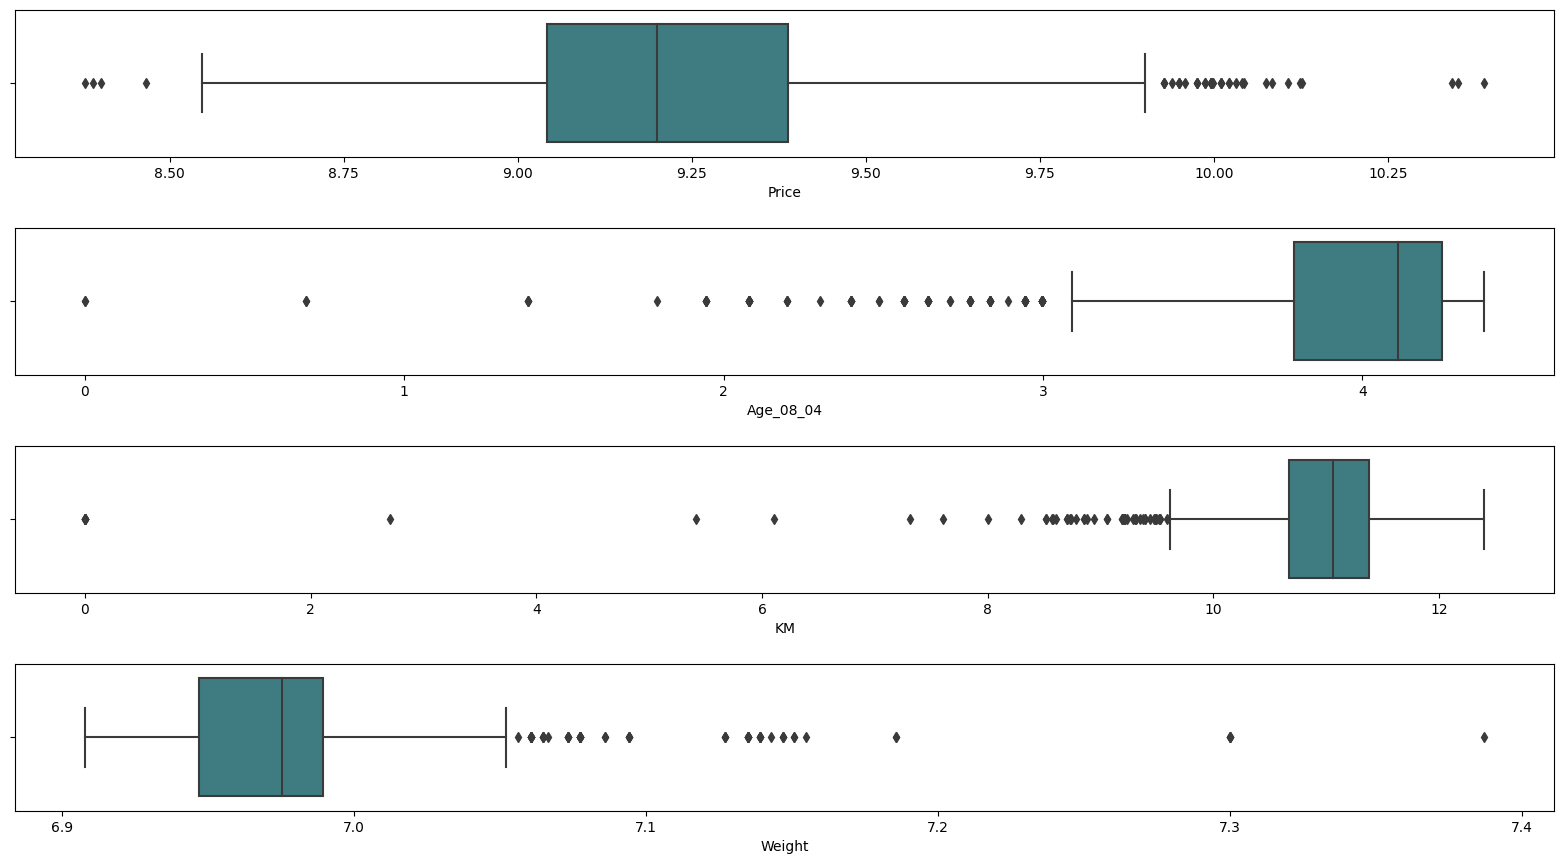

In [38]:
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age_08_04',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [39]:
log_transfomed = data.copy()
log_transfomed[continuous_feature]=np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("Price~Age_08_04+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transformed_model.rsquared , log_transformed_model.rsquared_adj

(0.7069873404282618, 0.70637305812308)

Outliers are there

### Cuberoot Transformation

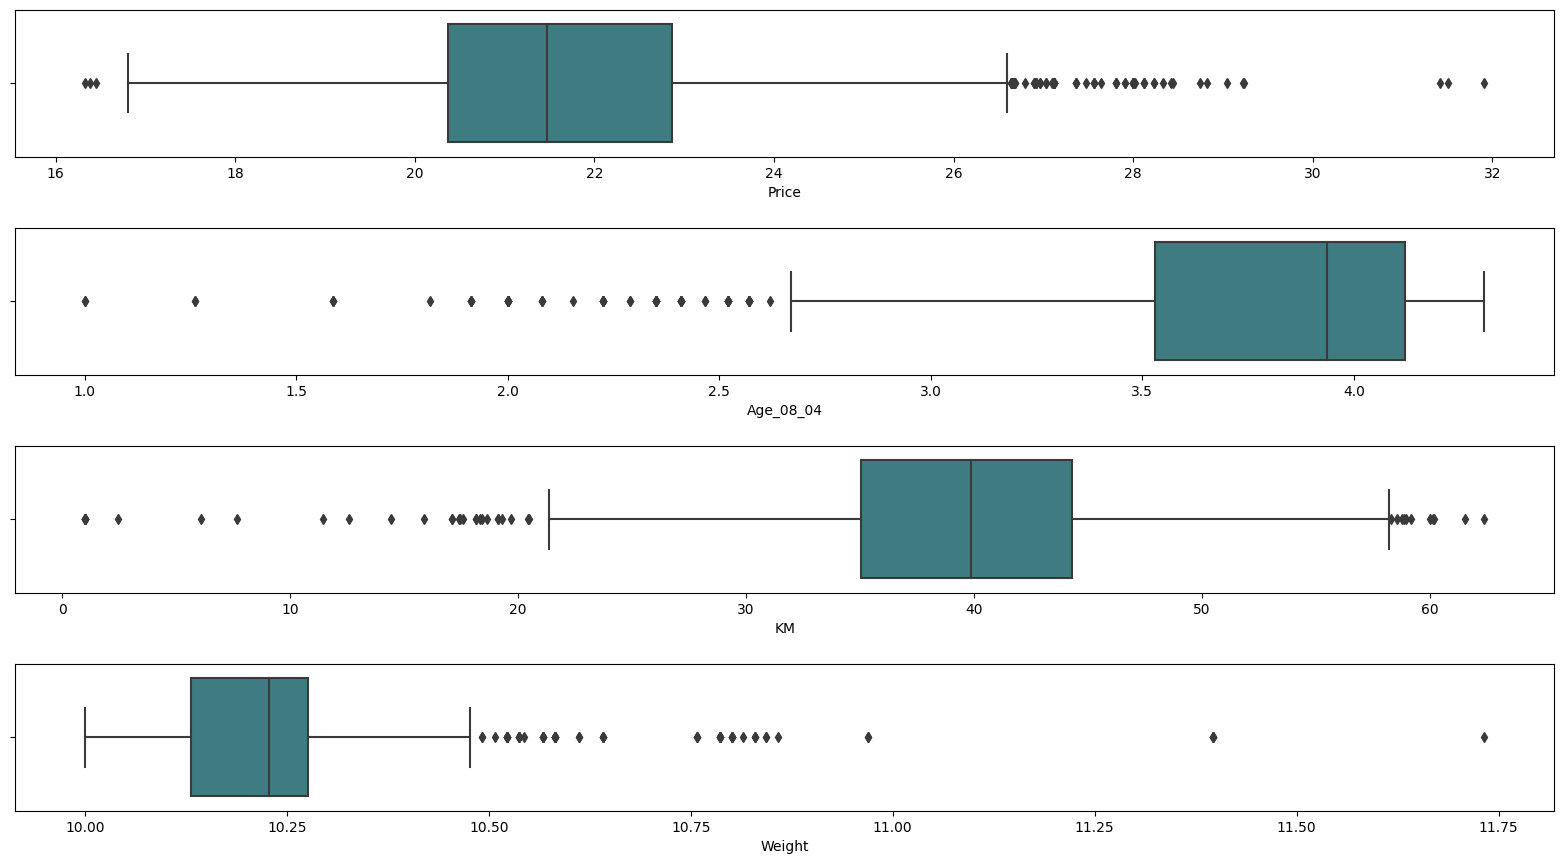

In [40]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age_08_04',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [41]:
cube_root_transfomed = data.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("Price~Age_08_04+KM+Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
cube_root_transformed_model.rsquared , cube_root_transformed_model.rsquared_adj

(0.8146046800585907, 0.8142160106247512)

Outliers are there

## Raw data model

In [42]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [180]:
raw_data_model = smf.ols("Price~Age_08_04+KM+Weight+HP+cc+Gears+Quarterly_Tax+Doors", data = data).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:13:36   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
np.sqrt(raw_data_model.mse_resid)

1342.4719466619235

### Detecting Influencers/Outliers in the Model

In [182]:
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance

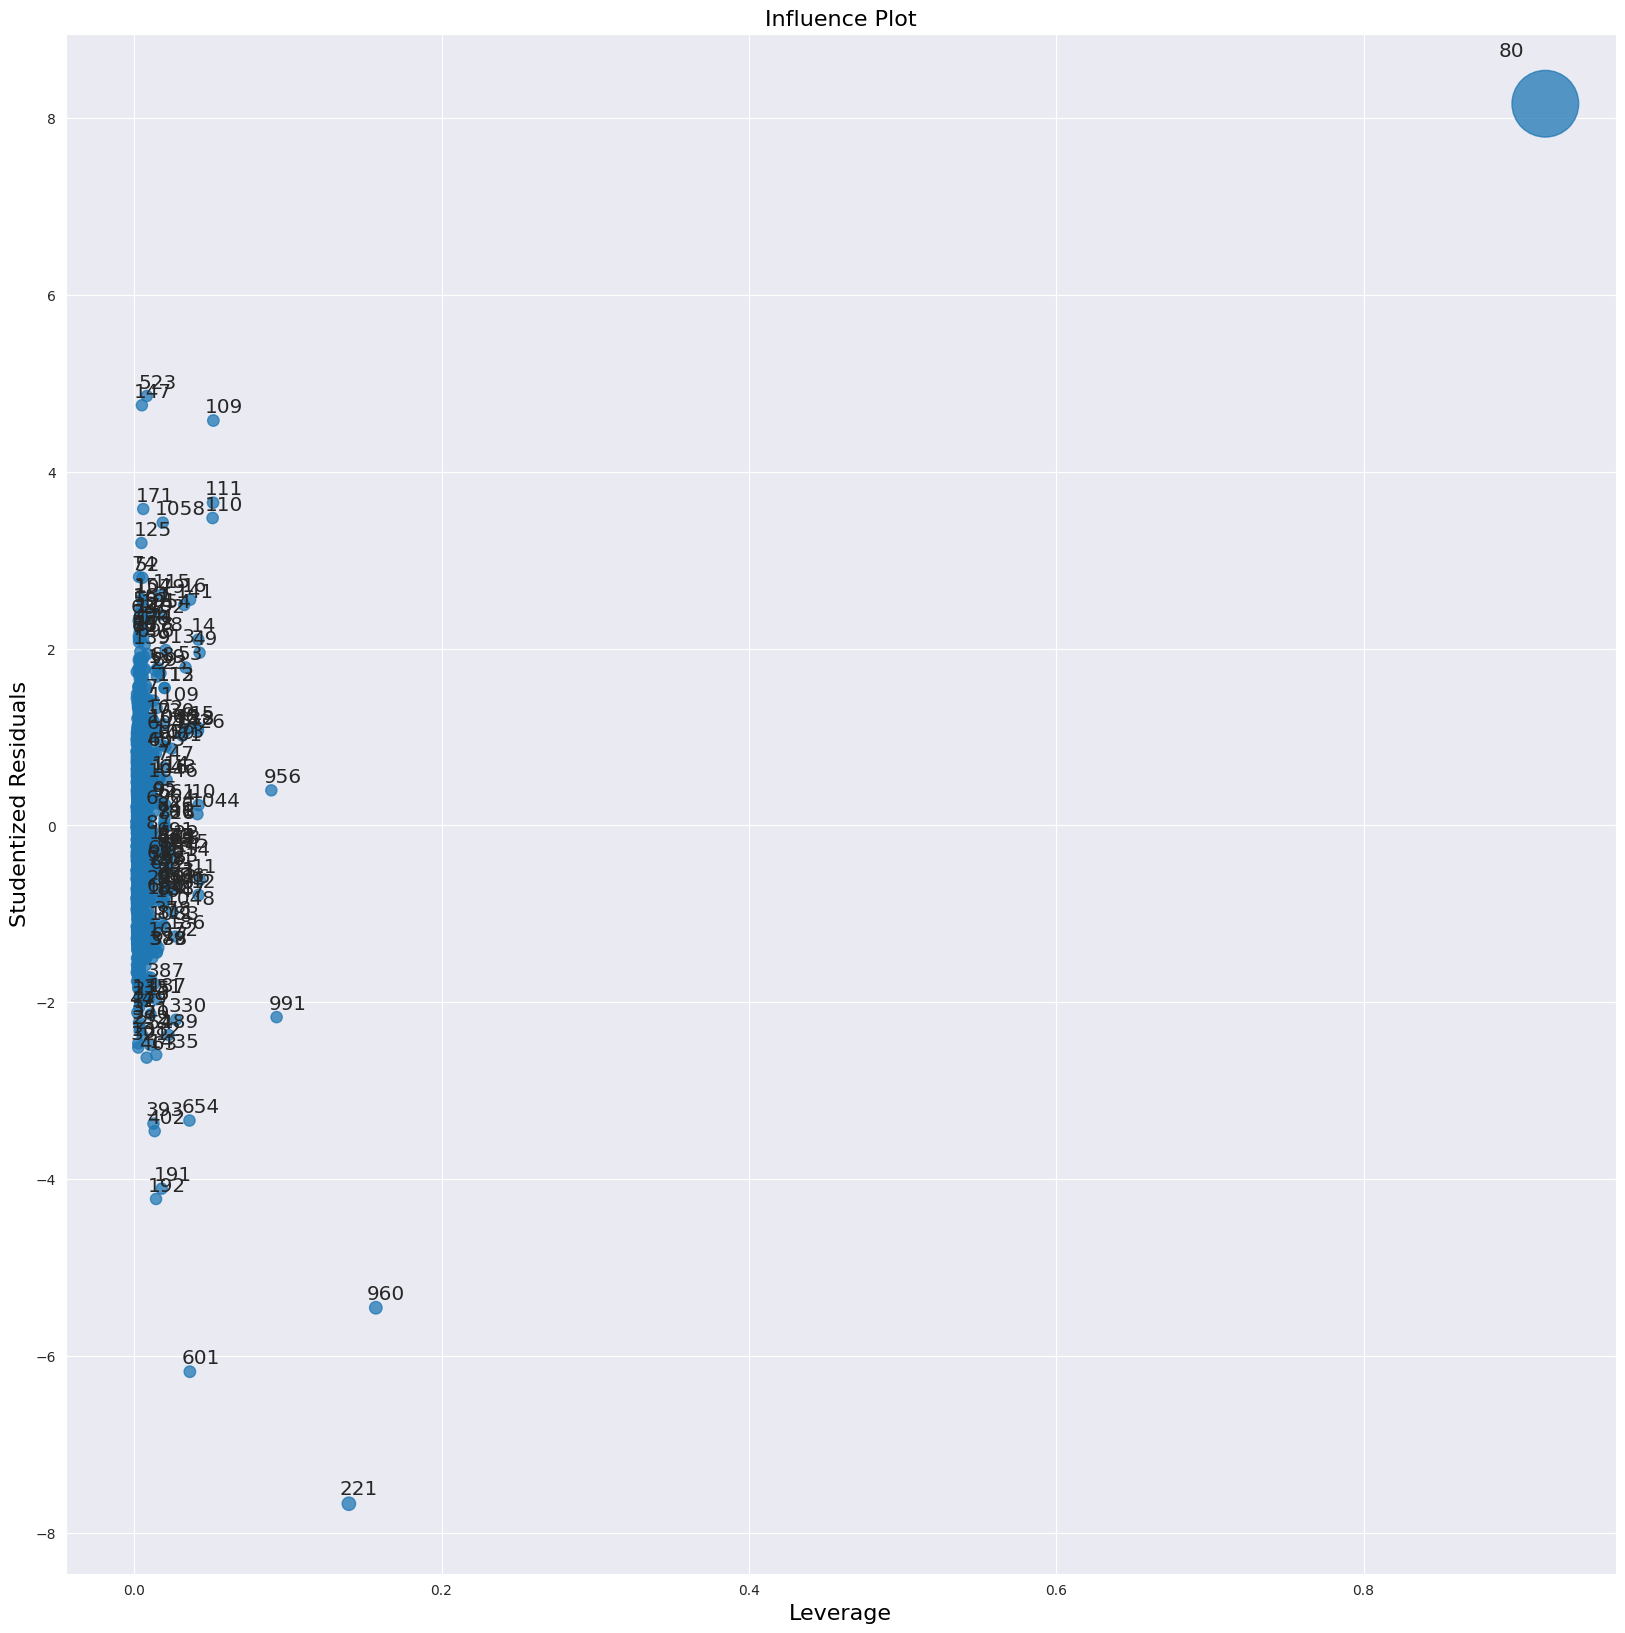

In [183]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of

features/columns & n = no. of datapoints

In [184]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


Plot the influencers and also plot a cut off line using the stem plot

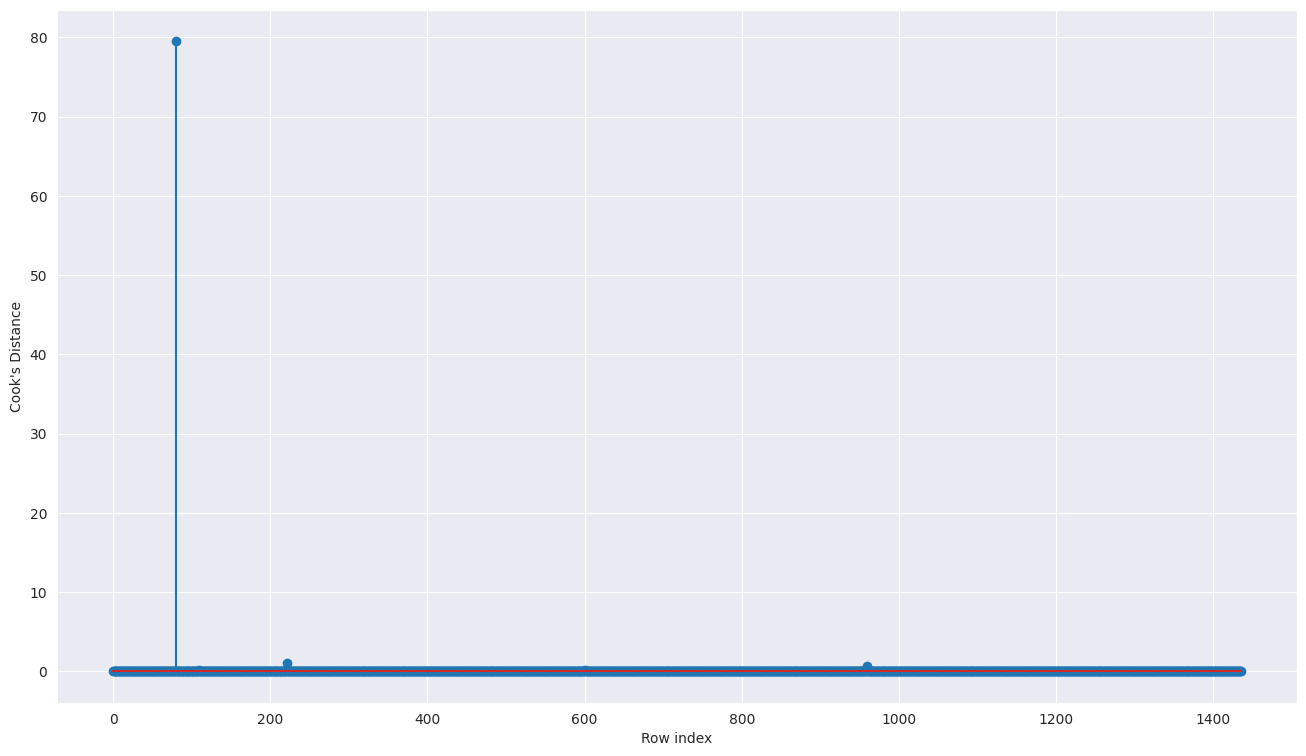

In [185]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [186]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 79.52010624140922)

In [187]:
data[data.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


Improve the model by deleting the influence point and creating a new dataframe

In [188]:
dataframe= data.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [189]:
data.shape

(1436, 9)

### Model Deletion Diagnostics and Final Model

In [190]:
# Another Method
"""k=dataframe.shape[1]
n=dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    dataframe
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)"""

'k=dataframe.shape[1]\nn=dataframe.shape[0]\nleverage_cutoff = (3*(k+1))/n\nwhile np.max(c)>leverage_cutoff:\n    model=smf.ols(\'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight\',data=dataframe).fit()\n    (c,_)=model.get_influence().cooks_distance\n    c\n    np.argmax(c) , np.max(c)\n    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)\n    dataframe\nelse:\n    final_model=smf.ols(\'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight\',data=dataframe).fit()\n    final_model.rsquared , final_model.aic\n    print("Thus model accuracy is improved to",final_model.rsquared)'

In [191]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=dataframe).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8778445878599779
Thus model accuracy is improved to 0.8851845904421738
Thus model accuracy is improved to 0.8894191849749752
Thus model accuracy is improved to 0.8914204825569462
Thus model accuracy is improved to 0.8921467826162199
Thus model accuracy is improved to 0.8934037497368835
Thus model accuracy is improved to 0.8944954473640403
Thus model accuracy is improved to 0.8958333530393431
Thus model accuracy is improved to 0.8966334481080779
Thus model accuracy is improved to 0.8941835374074523
Thus model accuracy is improved to 0.8951069956497653
Thus model accuracy is improved to 0.8965514940097824
Thus model accuracy is improved to 0.8971531368893259
Thus model accuracy is improved to 0.8979680072945879
Thus model accuracy is improved to 0.8975421185310548
Thus model accuracy is improved to 0.8970095523065386
Thus model accuracy is improved to 0.8965434597967323
Thus model accuracy is improved to 0.8961255789744986
Thus model accuracy is impro

In [192]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [193]:
dataframe.shape

(1330, 9)

In [194]:
dataframe.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245


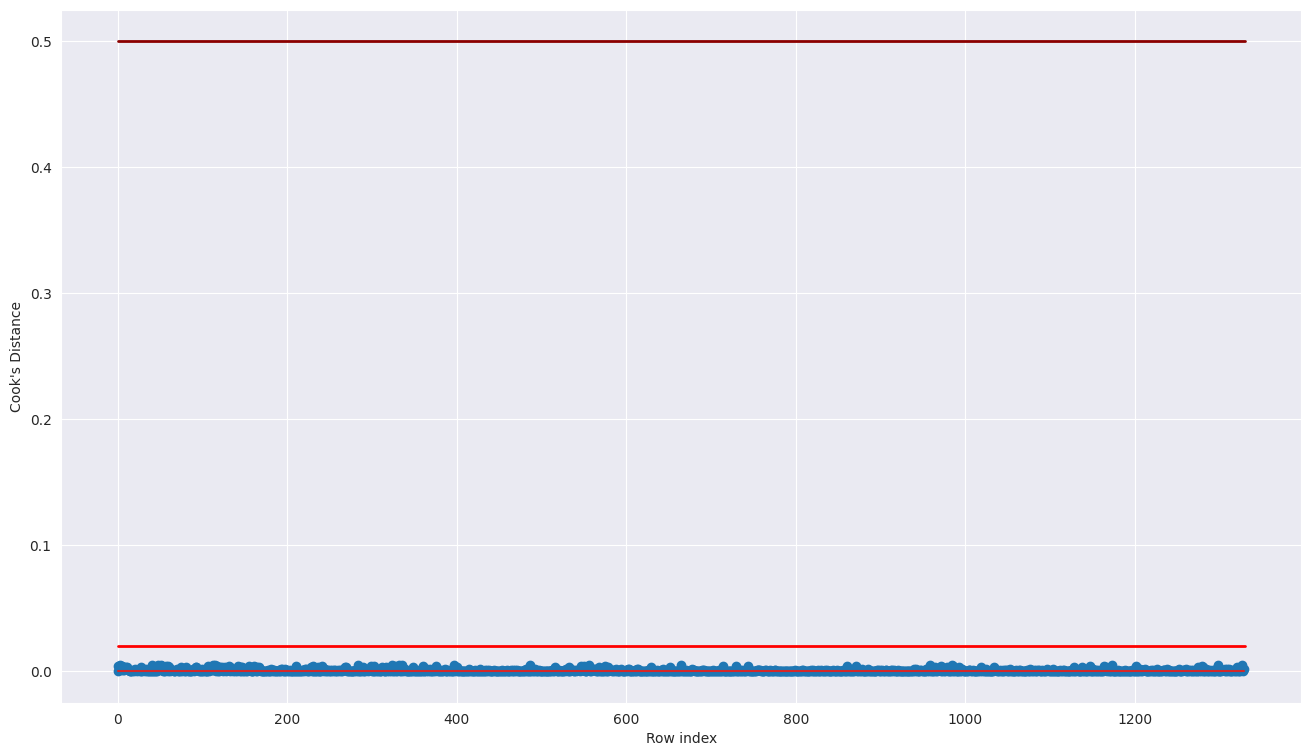

In [195]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [196]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:15:36   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
Age_08_04      -108.2573      2.181    -49.648      0.000    -112.535    -103.980
KM               -0.0155      0.001    -14.830      0.000      -0.018      -0.013
HP                7.8533      3.037      2.586      0.010       1.895      13.812
cc               -2.2731      0.291     -7.799      0.000      -2.845      -1.701
Doors          -149.1873     32.432     -4.600      0.000    -212.811     -85.563
Gears           251.4363    163.559      1.537      0.124     -69.428     572.301
Quarterly_Tax   -11.6187      1.626     -7.144      0.000     -14.809      -8.428
Weight           36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
np.sqrt(final_model.mse_resid)

975.9271399262798

## Feature Engineering

Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it score

### Log Transformation

In [198]:
df_log_scaled = pd.DataFrame()
df_log_scaled['Age_08_04'] = np.log(dataframe.Age_08_04)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['cc'] = dataframe['cc']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

,Age_08_04,Price,KM,Weight,cc,Doors,HP
0,3.135494,9.528794,11.197351,7.060476,2000,3,90
1,3.258097,9.612467,10.778956,7.060476,2000,3,90
2,3.401197,9.528794,10.558414,7.064759,2000,3,90
3,3.465736,9.468851,11.018629,7.064759,2000,3,90
4,3.295837,9.735069,11.457540,7.126891,2000,3,90


In [199]:
log_transformed_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Weight", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     729.6
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:16:00   Log-Likelihood:                 843.01
No. Observations:                1330   AIC:                            -1672.
Df Residuals:                    1323   BIC:                            -1636.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3980      1.353     -3.991      0.000      -8.052      -2.745
Age_08_04     -0.4079      0.013    -30.586      0.000      -0.434      -0.382
KM             0.0034      0.006      0.594      0.552      -0.008       0.015
HP             0.0032      0.000     11.096      0.000       0.003       0.004
cc            -0.0003   3.33e-05     -8.494      0.000      -0.000      -0.000
Doors         -0.0039      0.004     -0.927      0.354      -0.012       0.004
Weight         2.3427      0.197     11.867      0.000       1.955       2.730
==============================================================================
Omnibus:                      284.802   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.768
Skew:                          -0.976   Prob(JB):                    4.31e-249
Kurtosis:                       7.103   Cond. No.                     6.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cube Root Transformation

In [201]:
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age_08_04'] = np.cbrt(dataframe.Age_08_04)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['cc'] = dataframe['cc']
df_cbrt_scaled['Quarterly_Tax'] = dataframe['Quarterly_Tax']
df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()

,Age_08_04,Price,KM,Weight,cc,Quarterly_Tax,Doors,Gears,HP
0,2.843867,23.957099,41.781366,10.522251,2000,210,3,5,90
1,2.962496,24.634688,36.342412,10.522251,2000,210,3,5,90
2,3.107233,23.957099,33.766567,10.537282,2000,210,3,5,90
3,3.174802,23.483163,39.364972,10.537282,2000,210,3,5,90
4,3.000000,25.662299,45.566822,10.757791,2000,210,3,5,90


In [202]:
cbrt_transformed_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     991.6
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:16:54   Log-Likelihood:                -1505.8
No. Observations:                1330   AIC:                             3030.
Df Residuals:                    1321   BIC:                             3076.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -18.5991      3.723     -4.996      0.000     -25.902     -11.296
Age_08_04        -2.5835      0.069    -37.297      0.000      -2.719      -2.448
KM               -0.0450      0.004    -11.317      0.000      -0.053      -0.037
HP                0.0139      0.002      6.029      0.000       0.009       0.018
cc               -0.0013      0.000     -5.690      0.000      -0.002      -0.001
Doors            -0.0179      0.025     -0.707      0.480      -0.067       0.032
Gears             0.2967      0.126      2.350      0.019       0.049       0.544
Quarterly_Tax    -0.0016      0.001     -1.232      0.218      -0.004       0.001
Weight            5.0086      0.375     13.353      0.000       4.273       5.744
==============================================================================
Omnibus:                       83.976   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.525
Skew:                          -0.447   Prob(JB):                     2.79e-34
Kurtosis:                       4.410   Cond. No.                     2.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Square Root Transformation

In [203]:
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age_08_04'] = np.sqrt(dataframe.Age_08_04)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['cc'] = dataframe['cc']
df_sqrt_scaled['Quarterly_Tax'] = dataframe['Quarterly_Tax']
df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

,Age_08_04,Price,KM,Weight,cc,Quarterly_Tax,Doors,Gears,HP
0,4.795832,117.260394,270.068510,34.132096,2000,210,3,5,90
1,5.099020,122.270193,219.089023,34.132096,2000,210,3,5,90
2,5.477226,117.260394,196.214169,34.205263,2000,210,3,5,90
3,5.656854,113.798067,246.981781,34.205263,2000,210,3,5,90
4,5.196152,130.000000,307.590637,35.284558,2000,210,3,5,90


In [204]:
sqrt_transformed_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1229.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:17:12   Log-Likelihood:                -3993.0
No. Observations:                1330   AIC:                             8004.
Df Residuals:                    1321   BIC:                             8051.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -100.7308     15.607     -6.454      0.000    -131.348     -70.114
Age_08_04        -6.7197      0.157    -42.795      0.000      -7.028      -6.412
KM               -0.0384      0.003    -13.802      0.000      -0.044      -0.033
HP                0.0766      0.015      5.084      0.000       0.047       0.106
cc               -0.0082      0.001     -5.622      0.000      -0.011      -0.005
Doors            -0.2049      0.164     -1.251      0.211      -0.526       0.116
Gears             2.0321      0.819      2.481      0.013       0.425       3.639
Quarterly_Tax    -0.0209      0.008     -2.563      0.010      -0.037      -0.005
Weight            7.9388      0.500     15.875      0.000       6.958       8.920
==============================================================================
Omnibus:                        7.852   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.528
Skew:                          -0.128   Prob(JB):                       0.0141
Kurtosis:                       3.297   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's try Robust transformation

The Robust Scaler, as the name suggests is not sensitive to outliers.


1.This scaler removes the median from the data

2.Scales the data by the InterQuartile Range(IQR)

The interquartile range can be defined as-

IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

In [205]:
df_robust_scaled = dataframe.copy()
columns= ['Price','Age_08_04','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1.175000,-1.583333,0.211503,90,2000,3,5,210,2.222222
1,1.538636,-1.458333,-0.375961,90,2000,3,5,210,2.222222
2,1.175000,-1.291667,-0.599762,90,2000,3,5,210,2.333333
3,0.932576,-1.208333,-0.069708,90,2000,3,5,210,2.333333
4,2.129545,-1.416667,0.722122,90,2000,3,5,210,4.000000


In [207]:
robust_transformed_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:18:34   Log-Likelihood:                -262.35
No. Observations:                1330   AIC:                             542.7
Df Residuals:                    1321   BIC:                             589.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9936      0.285      3.487      0.001       0.435       1.553
Age_08_04        -0.7873      0.016    -49.648      0.000      -0.818      -0.756
KM               -0.1989      0.013    -14.830      0.000      -0.225      -0.173
HP                0.0024      0.001      2.586      0.010       0.001       0.004
cc               -0.0007   8.83e-05     -7.799      0.000      -0.001      -0.001
Doors            -0.0452      0.010     -4.600      0.000      -0.064      -0.026
Gears             0.0762      0.050      1.537      0.124      -0.021       0.173
Quarterly_Tax    -0.0035      0.000     -7.144      0.000      -0.004      -0.003
Weight            0.5042      0.020     25.566      0.000       0.466       0.543
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     5.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Applying Standard Scaler

For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to a normal distribution and then apply this scaler

In [208]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [209]:
standard_scaler_transformed_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:20:02   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age_08_04        -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM               -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP                0.0325      0.013      2.586      0.010       0.008       0.057
cc               -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors            -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears             0.0138      0.009      1.537      0.124      -0.004       0.032
Quarterly_Tax    -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight            0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After the transformation and building models the R-Squared had varince with respect to other transformations

## Building Multi Linear Resgression there are assumption regarding the data set.

### They are as follows:-
1.Feature should be independent of each other there should'nt be any dependency upon each other

2.There shouldn't any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)

3.Each Feature and Model Error (residuals) should be independent of each other

4.Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

5.There should be a linear relation between the dependent variable and Independent variables

We will Check the above one by one

### Preparing a Model

In [210]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:20:21   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age_08_04        -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM               -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP                0.0325      0.013      2.586      0.010       0.008       0.057
cc               -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors            -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears             0.0138      0.009      1.537      0.124      -0.004       0.032
Quarterly_Tax    -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight            0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ummary
The values we are concerned with are -

The coefficients and significance (p-values) R-squared F statistic and its significance

R - squared is 0.896 Meaning that 89.9% of the variance in cnt with registered
This is a decent R-squared value.

3.F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

Note: If any of the above step is not followed our model can't be a good predictor

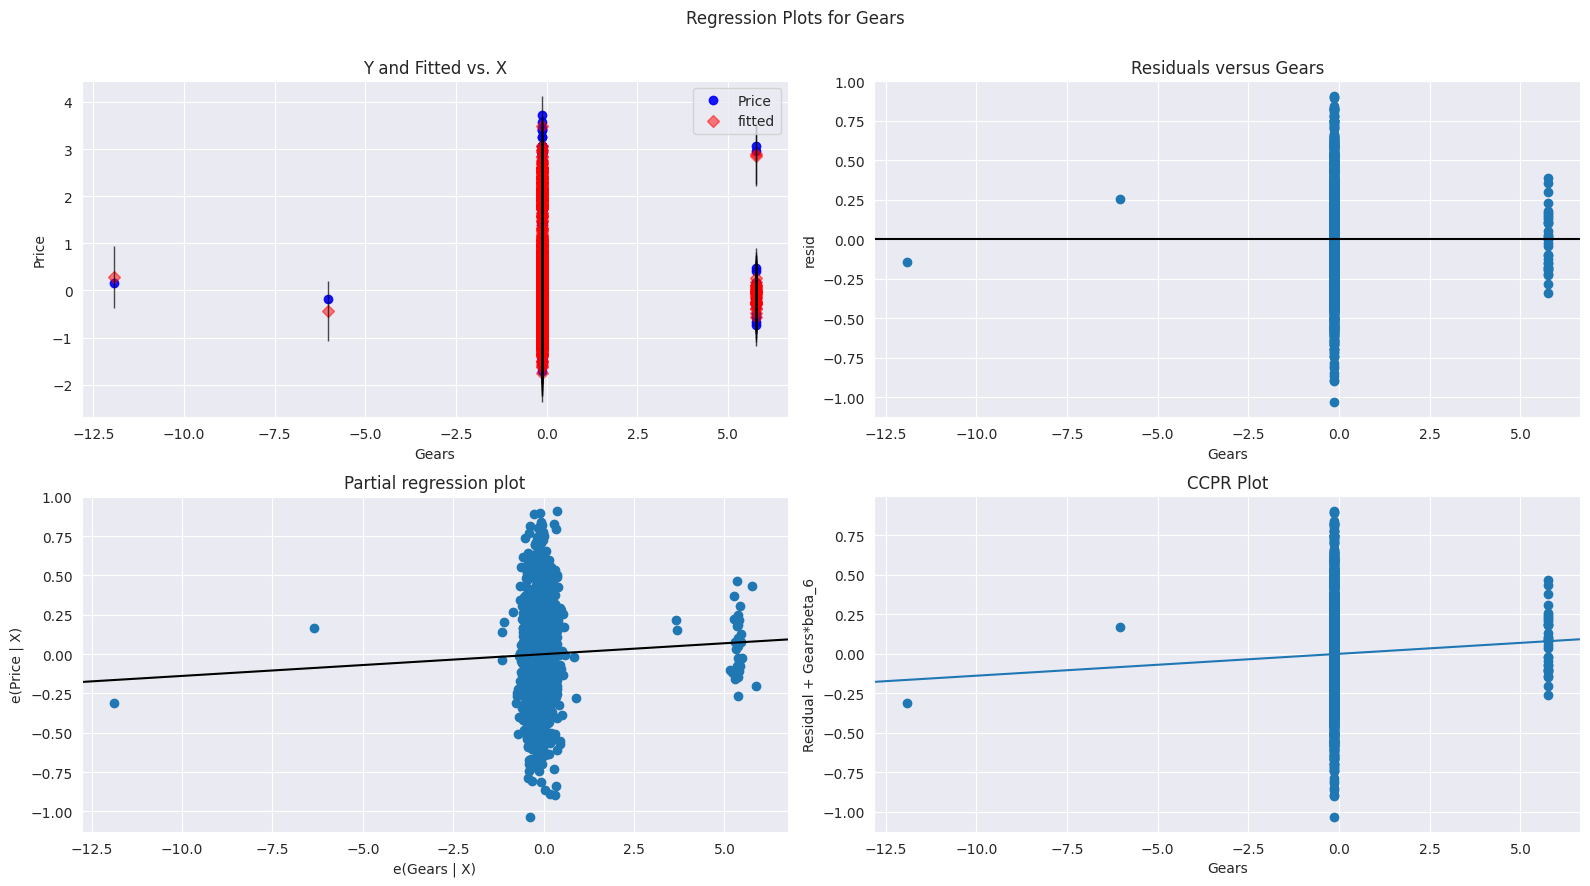

In [211]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

## VIF ( Variance Inflation Factor )

In [212]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y = df_standard_scaled.drop(['Price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Quarterly_Tax,4.86
7,Weight,4.74
3,cc,3.73
0,Age_08_04,2.09
2,HP,2.09
1,KM,1.86
4,Doors,1.34
5,Gears,1.08


In [213]:
r_sqr_age = smf.ols('Age_08_04~HP+Weight+cc+Doors+Quarterly_Tax+Gears+KM', dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight~HP+Age_08_04+cc+Doors+Quarterly_Tax+Gears+KM', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('cc~HP+Weight+Age_08_04+Doors+Quarterly_Tax+Gears+KM', dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP~Age_08_04+Weight+cc+Doors+Quarterly_Tax+Gears+KM', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_qt = smf.ols('Quarterly_Tax~HP+Weight+cc+Doors+Age_08_04+Gears+KM', dataframe).fit().rsquared
vif_qt = 1/(1-r_sqr_qt)
r_sqr_km = smf.ols('KM~HP+Weight+cc+Doors+Quarterly_Tax+Gears+Age_08_04', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears~HP+Weight+cc+Doors+Quarterly_Tax+Age_08_04+KM', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors~HP+Weight+cc+Age_08_04+Quarterly_Tax+Gears+KM', dataframe).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [214]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','cc','Age_08_04','Quarterly_Tax','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_qt,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

,VIF
Variables,
Gears,1.075124
Doors,1.336868
KM,1.858592
Age_08_04,2.091177
HP,2.094861
cc,3.725960
Weight,4.744228
Quarterly_Tax,4.863714


Quarterly_Tax VIF value is highest among others

In [215]:
#Simple Linear Model using QT
qt_model = smf.ols('Price~Quarterly_Tax', data=df_standard_scaled).fit()
qt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     24.53
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           8.27e-07
Time:                        15:21:00   Log-Likelihood:                -1875.0
No. Observations:                1330   AIC:                             3754.
Df Residuals:                    1328   BIC:                             3764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.537e-16      0.027   9.33e-15      1.000      -0.053       0.053
Quarterly_Tax     0.1347      0.027      4.952      0.000       0.081       0.188
==============================================================================
Omnibus:                      268.046   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.056
Skew:                           1.259   Prob(JB):                    5.15e-103
Kurtosis:                       4.469   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
gears_model = smf.ols('Price~Gears', data=df_standard_scaled).fit()
gears_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08310
Date:                Thu, 28 Dec 2023   Prob (F-statistic):              0.773
Time:                        15:21:11   Log-Likelihood:                -1887.1
No. Observations:                1330   AIC:                             3778.
Df Residuals:                    1328   BIC:                             3789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.537e-16      0.027   9.25e-15      1.000      -0.054       0.054
Gears          0.0079      0.027      0.288      0.773      -0.046       0.062
==============================================================================
Omnibus:                      289.163   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.772
Skew:                           1.333   Prob(JB):                    4.10e-115
Kurtosis:                       4.547   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
gears_qt_weight_model = smf.ols('Price~Gears+Quarterly_Tax', data=df_standard_scaled).fit()
gears_qt_weight_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.30
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           5.08e-06
Time:                        15:21:18   Log-Likelihood:                -1875.0
No. Observations:                1330   AIC:                             3756.
Df Residuals:                    1327   BIC:                             3772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.537e-16      0.027   9.33e-15      1.000      -0.053       0.053
Gears             0.0085      0.027      0.313      0.754      -0.045       0.062
Quarterly_Tax     0.1347      0.027      4.952      0.000       0.081       0.188
==============================================================================
Omnibus:                      268.324   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.601
Skew:                           1.260   Prob(JB):                    3.92e-103
Kurtosis:                       4.468   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Significance level - Backward elimination

We have different techniques to find out the features which have the maximum effect on the output.

Here we are going to look at the Backward elimination.

In this process we need to add one column of ones in the starting of the column.

In backward elimination we delete the value one by one whose significance level is less.

i.e In general we have a P-value and a significance level

P_value = 1 - (minus) significane level

or in other terms

p_value+ significance level = 1

if P_value is high significance level is less.

Hence we will be deleating features one by one whose P_value is high which means it has less significance level.

By eliminating process we get to the values which are of most significance

### Model1

Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Gears as it has a very high P Value of 0.75 in SLR and 0.12 in MLR has R square score of 0. Let's go ahead and drop this variable

In [218]:
# Dropping highly correlated variables and insignificant variables

x = df_standard_scaled.drop(['Gears'], axis=1)
y = df_standard_scaled.drop(['Gears','Price'], axis=1)

In [219]:
x.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [220]:
model_1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight', data = x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1703.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:21:47   Log-Likelihood:                -354.65
No. Observations:                1330   AIC:                             725.3
Df Residuals:                    1322   BIC:                             766.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age_08_04        -0.6233      0.013    -49.609      0.000      -0.648      -0.599
KM               -0.1743      0.012    -14.750      0.000      -0.197      -0.151
HP                0.0360      0.012      2.915      0.004       0.012       0.060
cc               -0.1329      0.017     -7.955      0.000      -0.166      -0.100
Doors            -0.0493      0.010     -5.016      0.000      -0.069      -0.030
Quarterly_Tax    -0.1350      0.019     -7.057      0.000      -0.172      -0.097
Weight            0.4850      0.019     25.656      0.000       0.448       0.522
==============================================================================
Omnibus:                        4.861   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.872
Skew:                           0.148   Prob(JB):                       0.0875
Kurtosis:                       2.984   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation: As our Multicollinearity problem has been solved
### Feature Selection Techniques in Machine Learning
### Correlation Coefficient
Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.

### Feature Selection Techniques in Machine Learning

### Correlation Coefficient

In [221]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<Axes: >

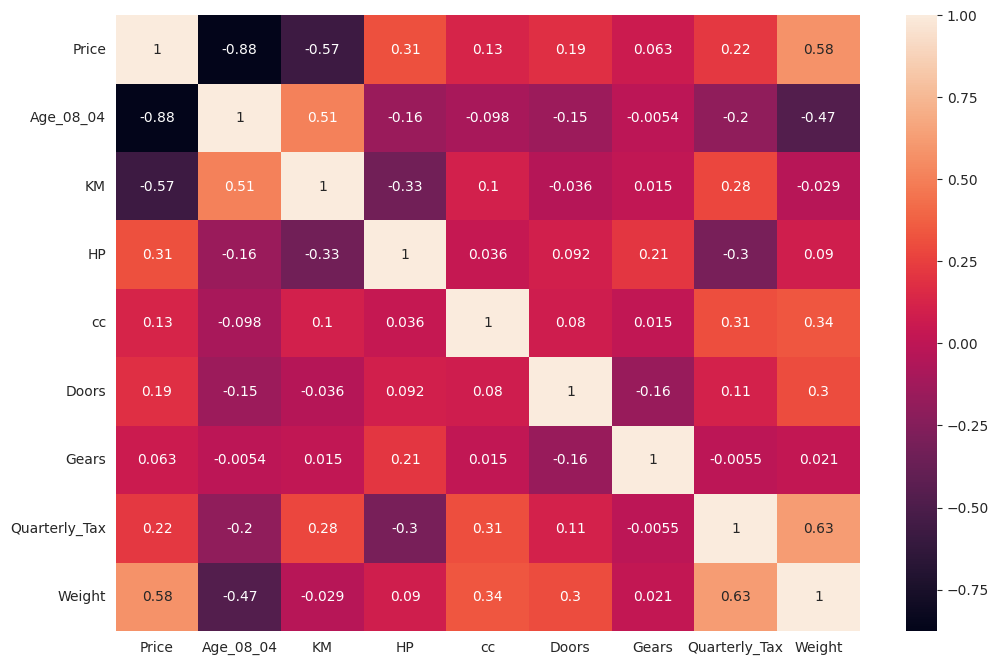

In [222]:
plt.figure(figsize=(12,8))
sns.heatmap(
    data.corr(),
    annot=True)

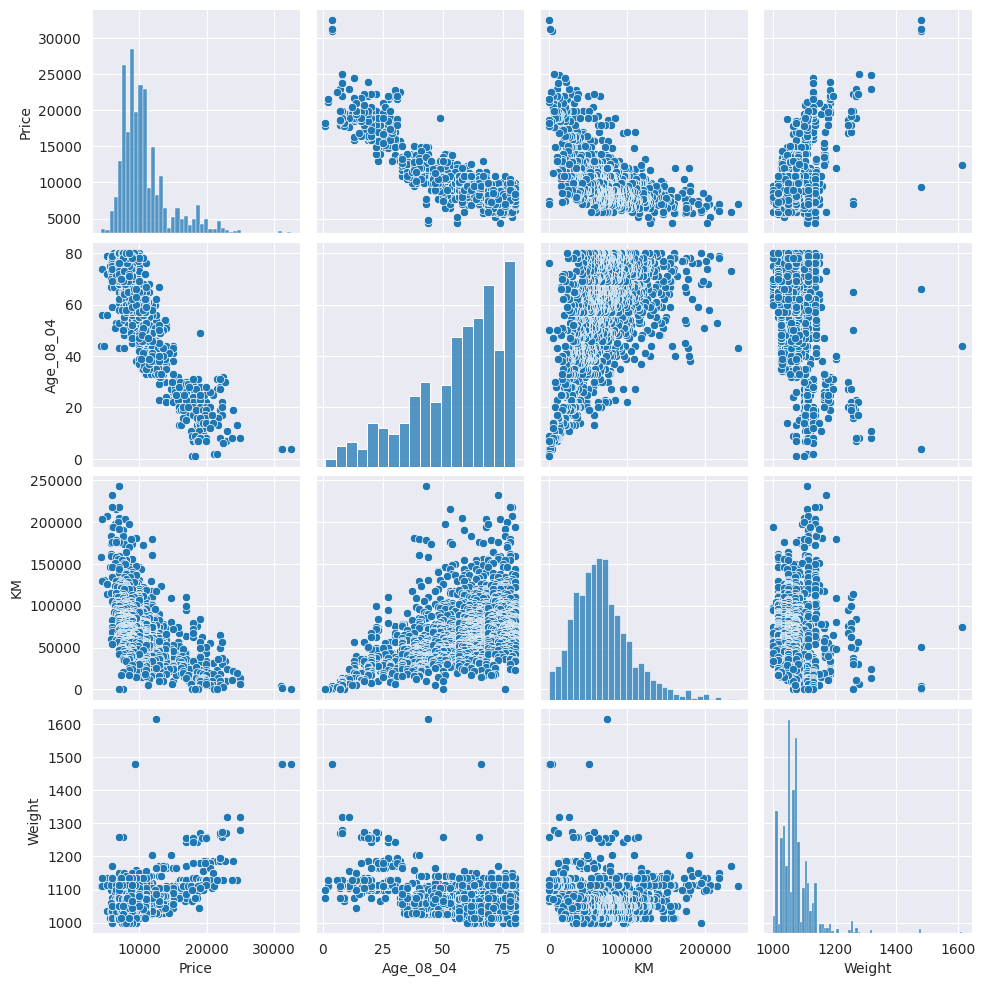

In [223]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continuous_feature])

^Observation: Age and KM has the highest score of correlation with Price but a negative correlation

Note: QT and Weight also have a collinearity among themselves which will affect our model.

Note: KM and Age also have a collinearity among themselves which will affect our model.

### Principal Component Analysis

Separtate the X and Y values

In [224]:
df_standard_scaled.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [225]:
array = df_standard_scaled.values
x = array[:,1:]
y = array[:,1]

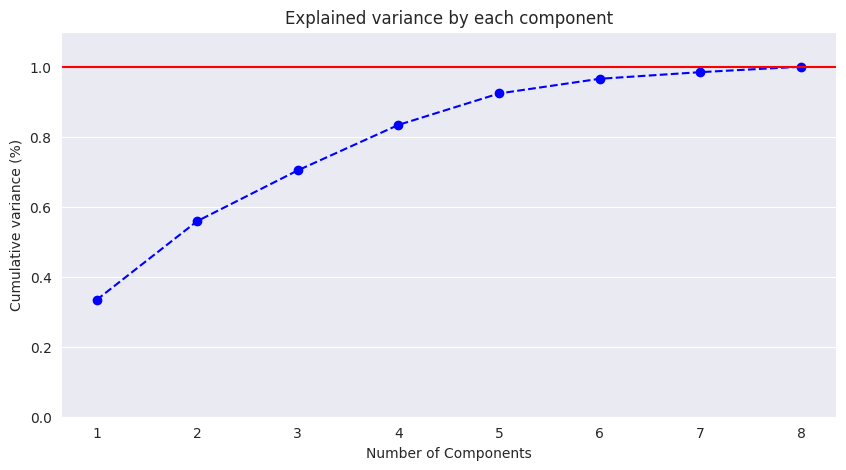

In [226]:
# PCA
pca_var = PCA()
pca_var.fit(x)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+x.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [227]:
# the amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.33354904, 0.22519775, 0.1451224 , 0.12991156, 0.08985917,
       0.04191581, 0.01895074, 0.01549353])

Text(0.5, 1.0, 'Explained variance by each component')

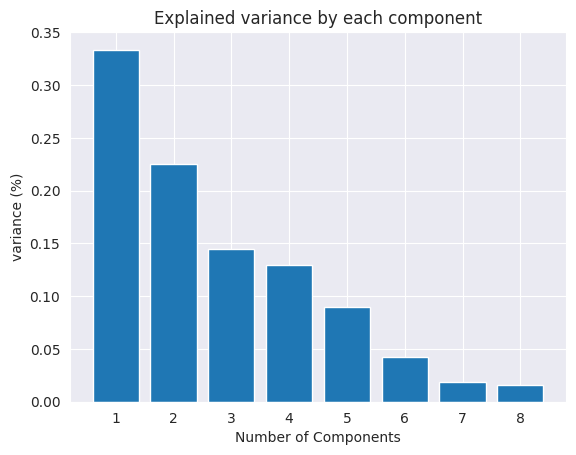

In [228]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [229]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 33.35,  55.87,  70.38,  83.37,  92.36,  96.55,  98.45, 100.  ])

In [230]:
# PCA
pca = PCA()
pca_std = pca.fit_transform(x)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(1330, 8)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162


In [231]:
dataframe.Price

0       13750
1       14950
2       13750
3       12950
4       16900
        ...  
1325     8450
1326     7500
1327    10845
1328     8500
1329     7250
Name: Price, Length: 1330, dtype: int64

In [232]:
pca_std_df['Price'] = y
pca_std_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560,-1.915503
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104,-1.746462
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730,-1.521074
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472,-1.408380
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162,-1.690115


In [233]:
import statsmodels.formula.api as sm
pca_model= sm.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data= pca_std_df).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.393e+31
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:23:12   Log-Likelihood:                 43515.
No. Observations:                1330   AIC:                        -8.701e+04
Df Residuals:                    1321   BIC:                        -8.697e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.061e-15   4.11e-17     25.793      0.000     9.8e-16    1.14e-15
PC1           -0.1952   2.52e-17  -7.76e+15      0.000      -0.195      -0.195
PC2           -0.5630   3.06e-17  -1.84e+16      0.000      -0.563      -0.563
PC3           -0.0925   3.82e-17  -2.42e+15      0.000      -0.092      -0.092
PC4            0.4131   4.03e-17   1.02e+16      0.000       0.413       0.413
PC5            0.0314   4.85e-17   6.48e+14      0.000       0.031       0.031
PC6           -0.6137    7.1e-17  -8.64e+15      0.000      -0.614      -0.614
PC7            0.2681   1.06e-16   2.54e+15      0.000       0.268       0.268
PC8            0.1273   1.17e-16   1.09e+15      0.000       0.127       0.127
==============================================================================
Omnibus:                      116.948   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.485
Skew:                           0.620   Prob(JB):                     1.31e-43
Kurtosis:                       4.424   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print('R2_score : ', pca_model.rsquared)
print('R2_Adjusted_score : ', pca_model.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  1.0
R2_Adjusted_score :  1.0
RMSE :  6012.984866656376


In [235]:
pca_std_df['Price'] = dataframe['Price']
pca_std_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560,13750
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104,14950
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730,13750
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472,12950
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162,16900


In [236]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((931, 8), (399, 8), (931,), (399,))

In [237]:
from sklearn.preprocessing import StandardScaler

#Scaling
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1))
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train_scal)

LinearRegression()

In [238]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9010967686242178
R2_score (train):  0.9058327433544345
R2_score (test):  0.8859113536009
RMSE using all features:  1044.486068620271


### Forward Selection

In [239]:
X = dataframe.drop('Price', axis =1)
Y = dataframe[['Price']]

In [240]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [241]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) < threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, -0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [242]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

((931, 8), (399, 8), (931, 1), (399, 1))

In [243]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(),
           k_features=4,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(x_train), y_train)


[2023-12-28 15:24:25] Features: 1/4 -- score: 0.8600129436013031
[2023-12-28 15:24:28] Features: 2/4 -- score: 0.8846096887541718
[2023-12-28 15:24:30] Features: 3/4 -- score: 0.9061855839992371
[2023-12-28 15:24:33] Features: 4/4 -- score: 0.9087411701259606

In [244]:
sfs1.k_feature_idx_

(0, 1, 2, 7)

In [245]:
x_train.columns[list(sfs1.k_feature_idx_)]

Index(['Age_08_04', 'KM', 'HP', 'Weight'], dtype='object')

### Regularization

In [246]:
# checking the magnitude of coefficients
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = 'Price ~ Age_08_04 + KM + HP + cc + Doors + Weight + Quarterly_Tax  + Gears'
reg_results = sm.ols(f, data=dataframe).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
print(coef_df)

         coef         err        varname
0 -108.257335    4.277641      Age_08_04
1   -0.015465    0.002046             KM
2    7.853334    5.958445             HP
3   -2.273119    0.571776             cc
4 -149.187276   63.623867          Doors
5   36.976781    2.837352         Weight
6  -11.618726    3.190591  Quarterly_Tax
7  251.436316  320.864248          Gears


<Axes: title={'center': 'Modal Coefficients'}, xlabel='varname'>

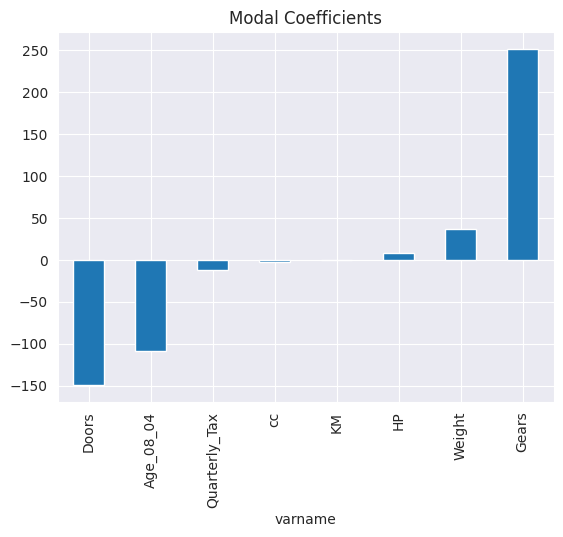

In [247]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

## Ridge Regression

In [261]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Assuming x_train, x_test, y_train, y_test are already defined
# If not, replace them with your actual data.

# Split the data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Ridge regression model
ridgeReg = Ridge(alpha=0.05)  # There is no 'normalize' parameter in Ridge
ridgeReg.fit(x_train, y_train)



Ridge(alpha=0.05)

In [263]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridgeReg.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.999999999999944
R2_score (train):  0.9999999999999565
R2_score (test):  0.9999999999999589
RMSE:  1.9055656778529888e-07


In [264]:
ridgeReg.coef_.flatten()

array([ 5.63470323e-02,  3.92711523e-12,  6.77156845e-10,  3.97541277e-10,
        3.13778152e-08,  1.97542855e-08,  5.15818282e-10, -5.39216768e-09])

In [265]:
coef_df = pd.DataFrame({'coef': ridgeReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

           coef        varname
0  5.634703e-02      Age_08_04
1  3.927115e-12             KM
2  6.771568e-10             HP
3  3.975413e-10             cc
4  3.137782e-08          Doors
5  1.975429e-08          Gears
6  5.158183e-10  Quarterly_Tax
7 -5.392168e-09         Weight


<Axes: title={'center': 'alpha = 0.01'}, xlabel='varname'>

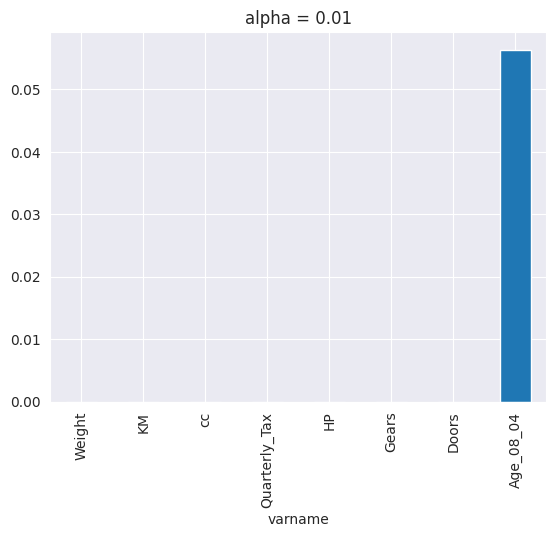

In [266]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.01')

<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

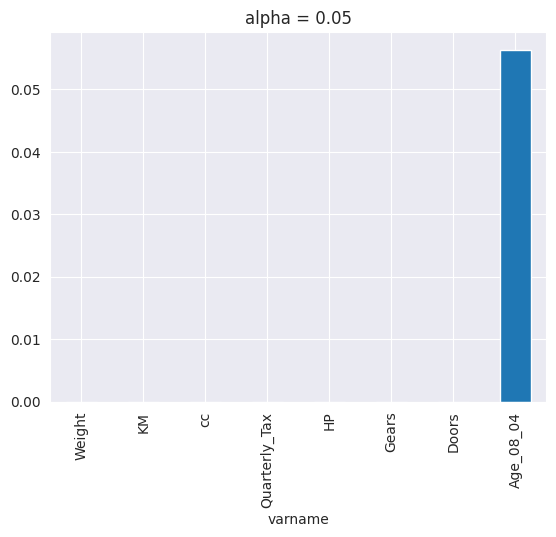

In [267]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

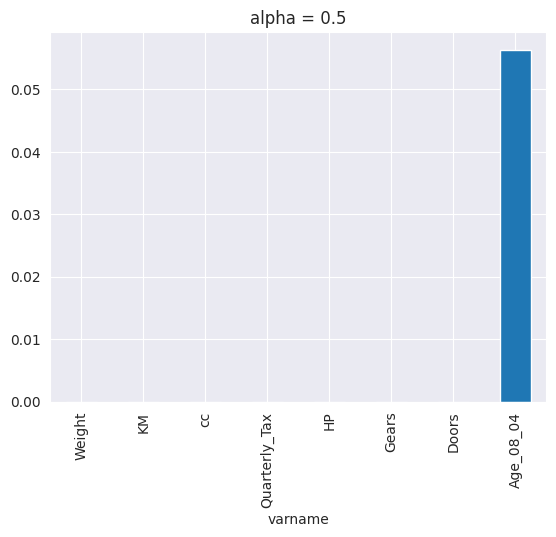

In [268]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

<Axes: title={'center': 'alpha = 5'}, xlabel='varname'>

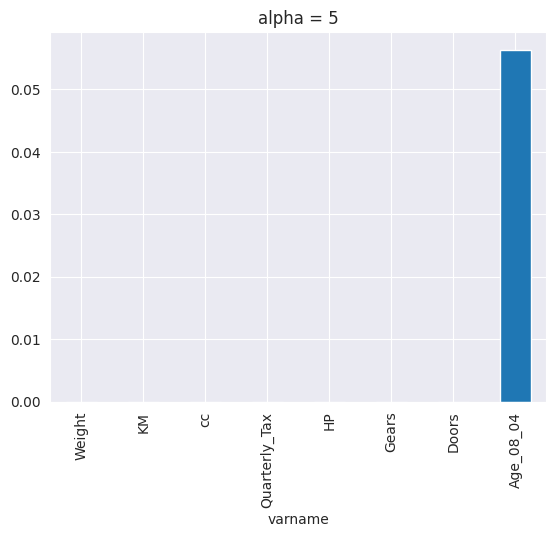

In [269]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 5')

<Axes: title={'center': 'alpha = 10'}, xlabel='varname'>

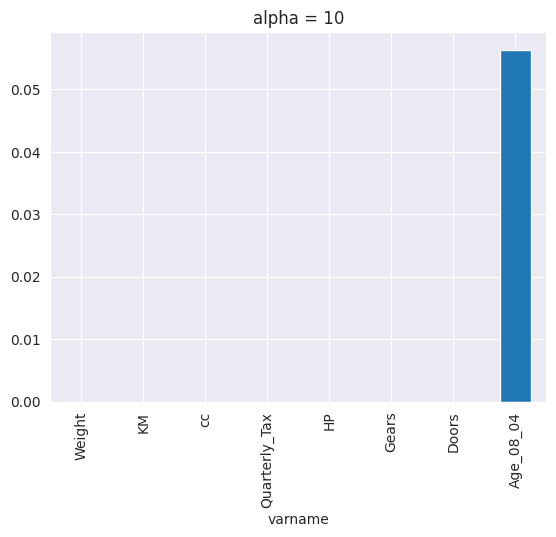

In [270]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 10')

 Increase the value of alpha, the magnitude of the coefficients decreases.

In [271]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.5, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [272]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
# Create a Ridge regression pipeline with StandardScaler
ridge_pipe = make_pipeline(StandardScaler(), Ridge(alpha=0.05))

# Convert y_train to a 1D array using .values.ravel()
cv_ridge = cross_val_score(estimator=ridge_pipe, X=x_train, y=y_train.ravel(), cv=10)

# Fit the entire pipeline on the training data
ridge_pipe.fit(x_train, y_train.ravel())

# Predicting R2 Score on the training set results
y_pred_ridge_train = ridge_pipe.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)



CV:  0.9999999941033003
R2_score (train):  0.9999999954323249
R2_score (test):  0.9999999956924315
RMSE:  6.173110351280263e-05


In [273]:
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Ridge"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
sel_ridge = SelectFromModel(Ridge(alpha=0.05))
sel_ridge.fit(x_train, y_train)

sel_ridge.get_support()

# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_ridge.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(x_train.columns[(sel_ridge.get_support())])

total features: 8
selected features: 1
Index(['Age_08_04'], dtype='object')


### LASSO Regression

In [276]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assuming x_train, x_test, y_train, y_test are already defined
# If not, replace them with your actual data.

# Normalize the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train the Lasso regression model
lassoReg = Lasso(alpha=0.5)
lassoReg.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = lassoReg.predict(x_test_scaled)


In [277]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

CV:  0.9989035885946083
R2_score (train):  -897.7077485665055
R2_score (test):  -1045.9345891259395
RMSE:  30.43320679750595


In [278]:
coef_df = pd.DataFrame({'coef': lassoReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

       coef        varname
0  0.514261      Age_08_04
1  0.000000             KM
2 -0.000000             HP
3 -0.000000             cc
4 -0.000000          Doors
5  0.000000          Gears
6 -0.000000  Quarterly_Tax
7 -0.000000         Weight


<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

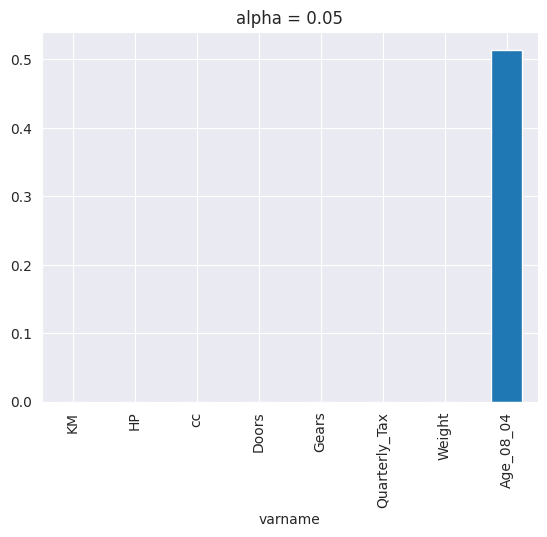

In [279]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

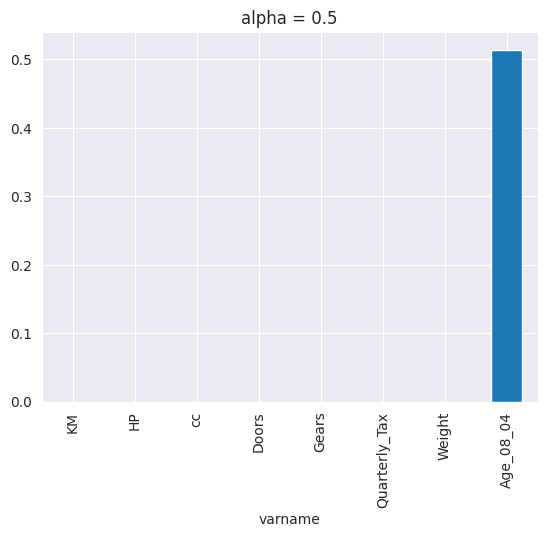

In [280]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5')

In [281]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.5, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.5, max_iter=2000, tol=0.0199))])

In [282]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.7544492813829388
R2_score (train):  0.756980888440651
R2_score (test):  0.756830377461376
RMSE:  0.46381266474121197


In [283]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [284]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_lasso = SelectFromModel(Lasso(alpha=100))
sel_lasso.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [285]:
sel_lasso.get_support()

array([False,  True, False, False, False, False, False, False])

In [286]:
# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_lasso.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_lasso.estimator_.coef_ == 0)))

total features: 8
selected features: 1
features with coefficients shrank to zero: 7


In [287]:
x_train.columns[(sel_lasso.get_support())]

Index(['KM'], dtype='object')

In [289]:
x = dataframe[['Age_08_04','KM','HP','cc','Doors','Quarterly_Tax','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age_08_04','KM','HP','cc','Doors','Quarterly_Tax','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(model_1.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(y, predict_unscaled)))
print('R2_score : ', model_1.rsquared)
print('R2_Adjusted_score : ', model_1.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  0.9001980293966751
R2_Adjusted_score :  0.8996695772073988
RMSE :  973.4891302577998


In [290]:
square_root_pred_y =np.square(sqrt_transformed_model.predict(df_sqrt_scaled[['Age_08_04','KM','HP','cc','Doors','Quarterly_Tax','Weight','Gears']]))
cube_root_pred_y =pow(cbrt_transformed_model.predict(df_cbrt_scaled[['Age_08_04','Weight','KM','HP','cc','Quarterly_Tax','Doors','Gears']]),3)
log_model_pred_y =np.exp(log_transformed_model.predict(df_log_scaled[['Age_08_04','Weight','KM','HP','cc','Doors']]))

In [291]:
square_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], square_root_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], cube_root_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], log_model_pred_y))

In [292]:
print('Raw Model=', np.sqrt(raw_data_model.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_both_rmse,
      '\n''After Cube-root Transformation on both Model=', cube_root_both_rmse,
     '\n''After Sqaure Root Transformation on both Model=', square_root_both_rmse,
      '\n''After Removing Influencers from model', np.sqrt(final_model.mse_resid),
     '\n''Final Model without Multicollinearity Model=', rmse_linear)

Raw Model= 976.7658733249547 
After Removing Influencers= 975.9271399262798 
After Log Transformation on both Model= 1795.826559210394 
After Cube-root Transformation on both Model= 1152.5577948742425 
After Sqaure Root Transformation on both Model= 1010.8979447569402 
After Removing Influencers from model 975.9271399262798 
Final Model without Multicollinearity Model= 973.4891302577998


**Comparing the Root Mean Squared Error and check for the minimum value**

In [293]:
rmse_compare = {'Raw Model': np.sqrt(raw_data_model.mse_resid),
      'After Removing Influencers': np.sqrt(final_model.mse_resid),
      'After Log Transformation Model': log_both_rmse,
      'After Cube-root Transformation Model': cube_root_both_rmse,
     'After Sqaure Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
   'Final Model without Multicollinearity Model': rmse_linear}
min(rmse_compare, key=rmse_compare.get)

'Final Model without Multicollinearity Model'

The Model that was build without Multicollinearity Issue and using Standard Scaler Transformation performed very well.

Scoring minimumn Root mean squared error and a good R-squared and adjusted R-squared

Note: We are going to rebuild the model by using that model

In [294]:
raw_data=ToyotaCorolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
raw_data
Final_model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight", data = raw_data).fit()
# Finding rsquared values
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1284.
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:36:50   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1428   BIC:                         2.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2750.5553   1059.491     -2.596      0.010   -4828.881    -672.229
Age_08_04      -121.7928      2.623    -46.439      0.000    -126.937    -116.648
KM               -0.0205      0.001    -16.395      0.000      -0.023      -0.018
HP               33.7306      2.743     12.297      0.000      28.350      39.111
cc               -0.1251      0.090     -1.385      0.166      -0.302       0.052
Doors           -24.5339     39.389     -0.623      0.533    -101.799      52.732
Quarterly_Tax     4.1227      1.312      3.141      0.002       1.548       6.697
Weight           16.9852      1.071     15.860      0.000      14.884      19.086
==============================================================================
Omnibus:                      151.778   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              992.853
Skew:                          -0.231   Prob(JB):                    2.54e-216
Kurtosis:                       7.047   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual analysis

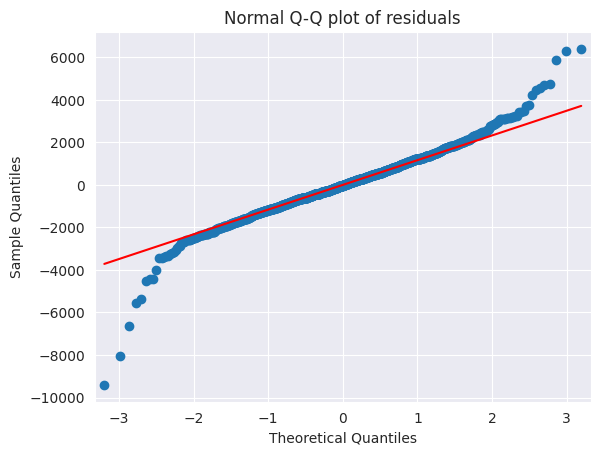

In [295]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Residuals values = y - yhat
sm.qqplot(Final_model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()


### Residual Plot for Homoscedasticity

In [296]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

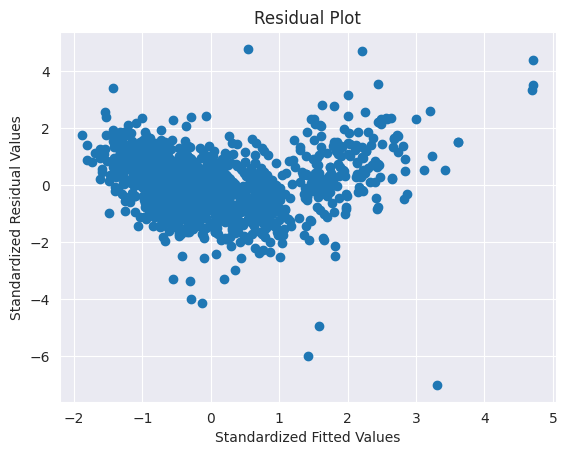

In [297]:
plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Residual VS Regressors

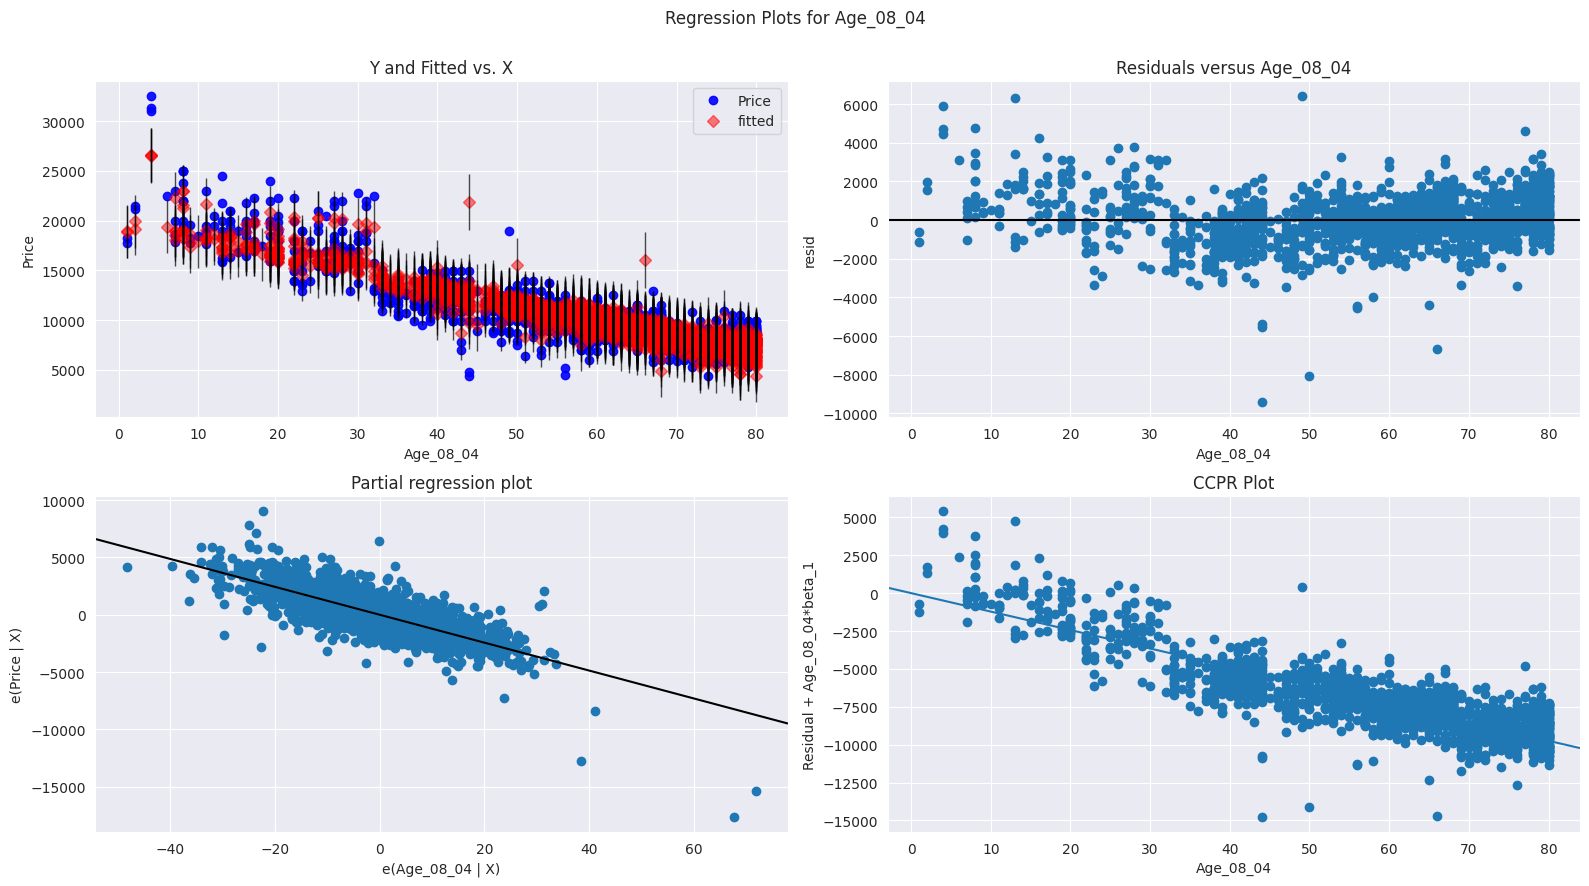

In [298]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Age_08_04', fig=fig)
plt.show()

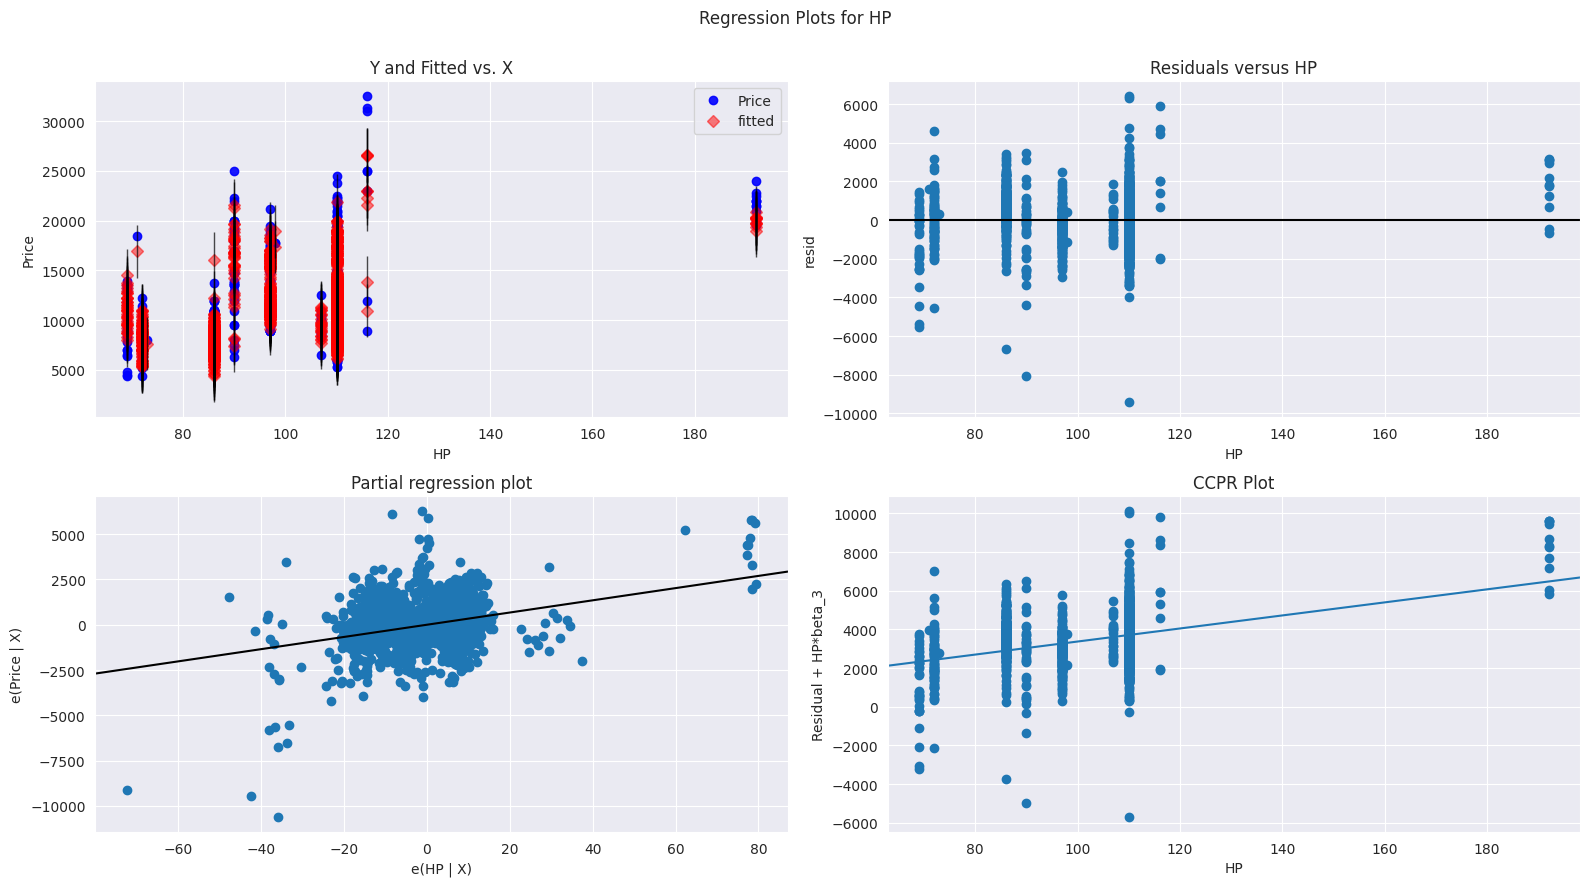

In [299]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

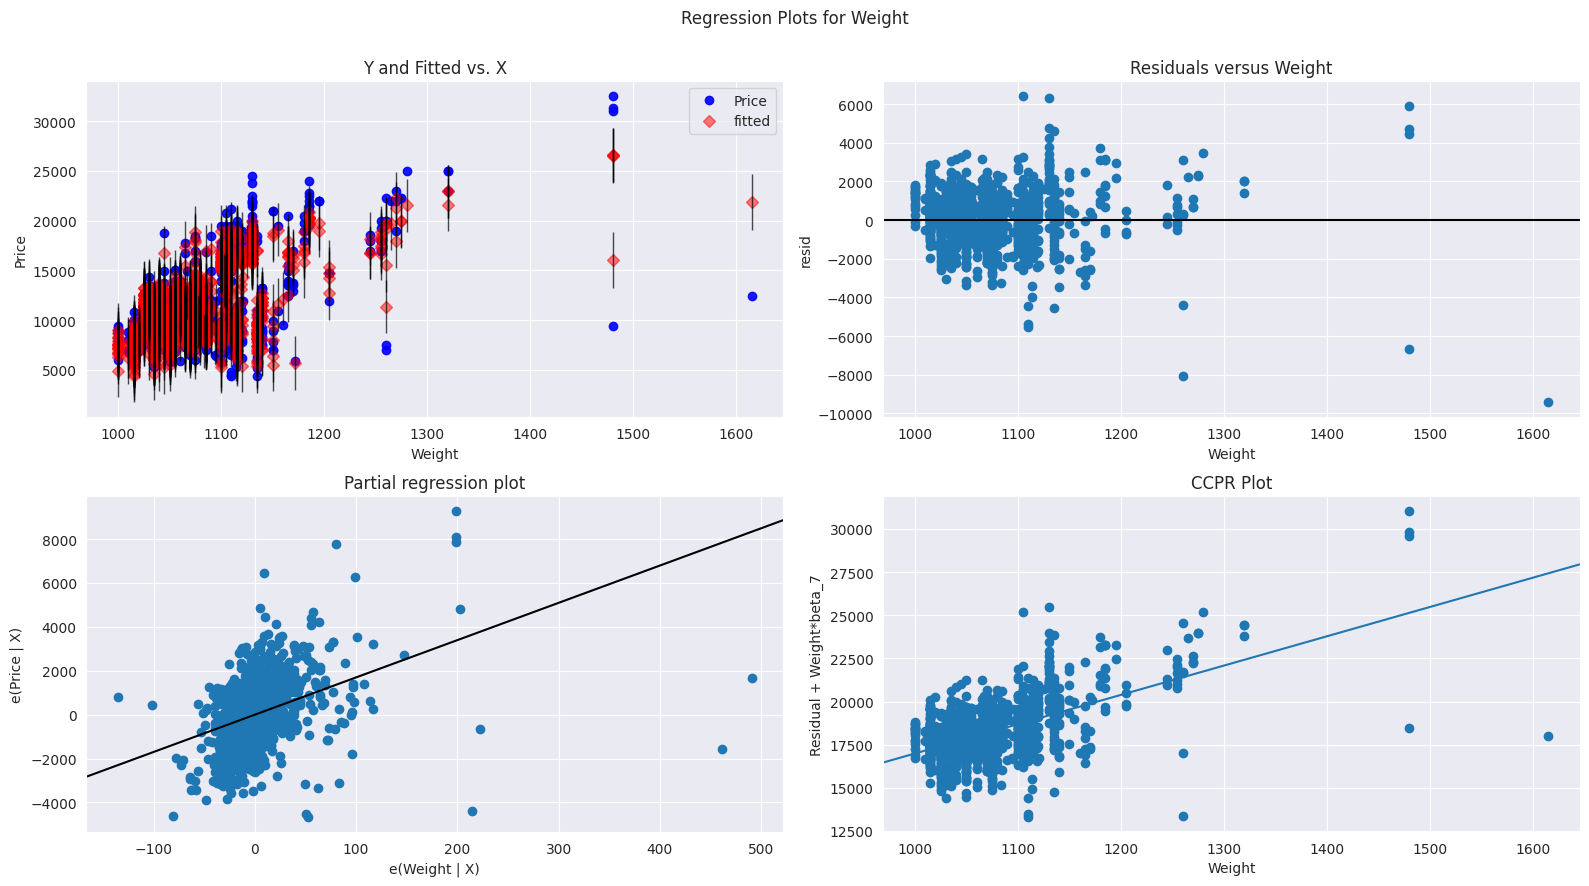

In [300]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Weight', fig=fig)
plt.show()

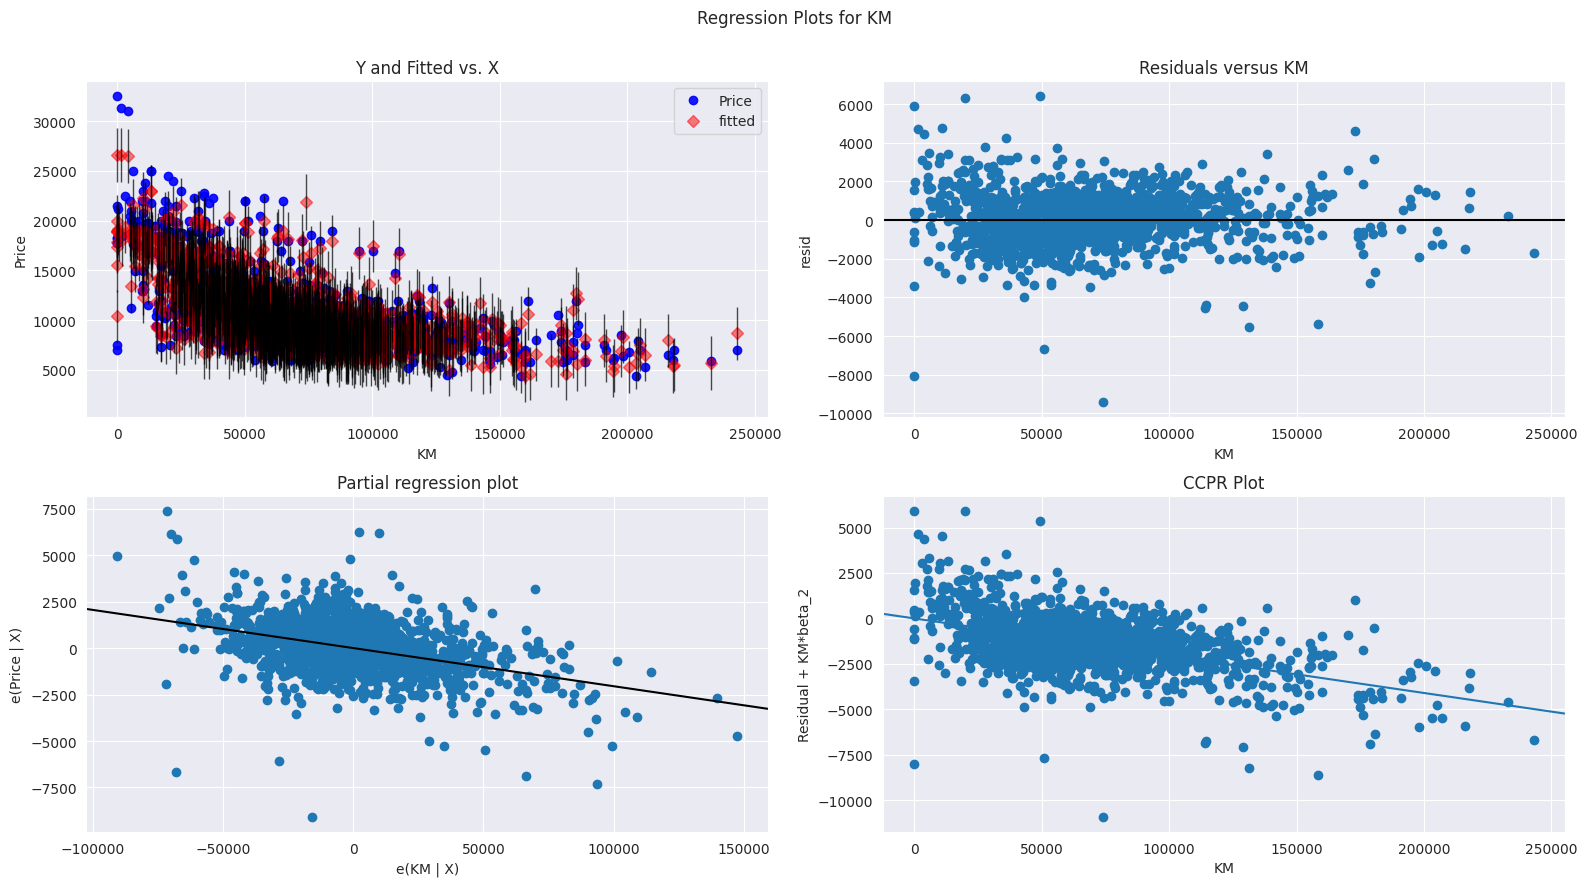

In [301]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

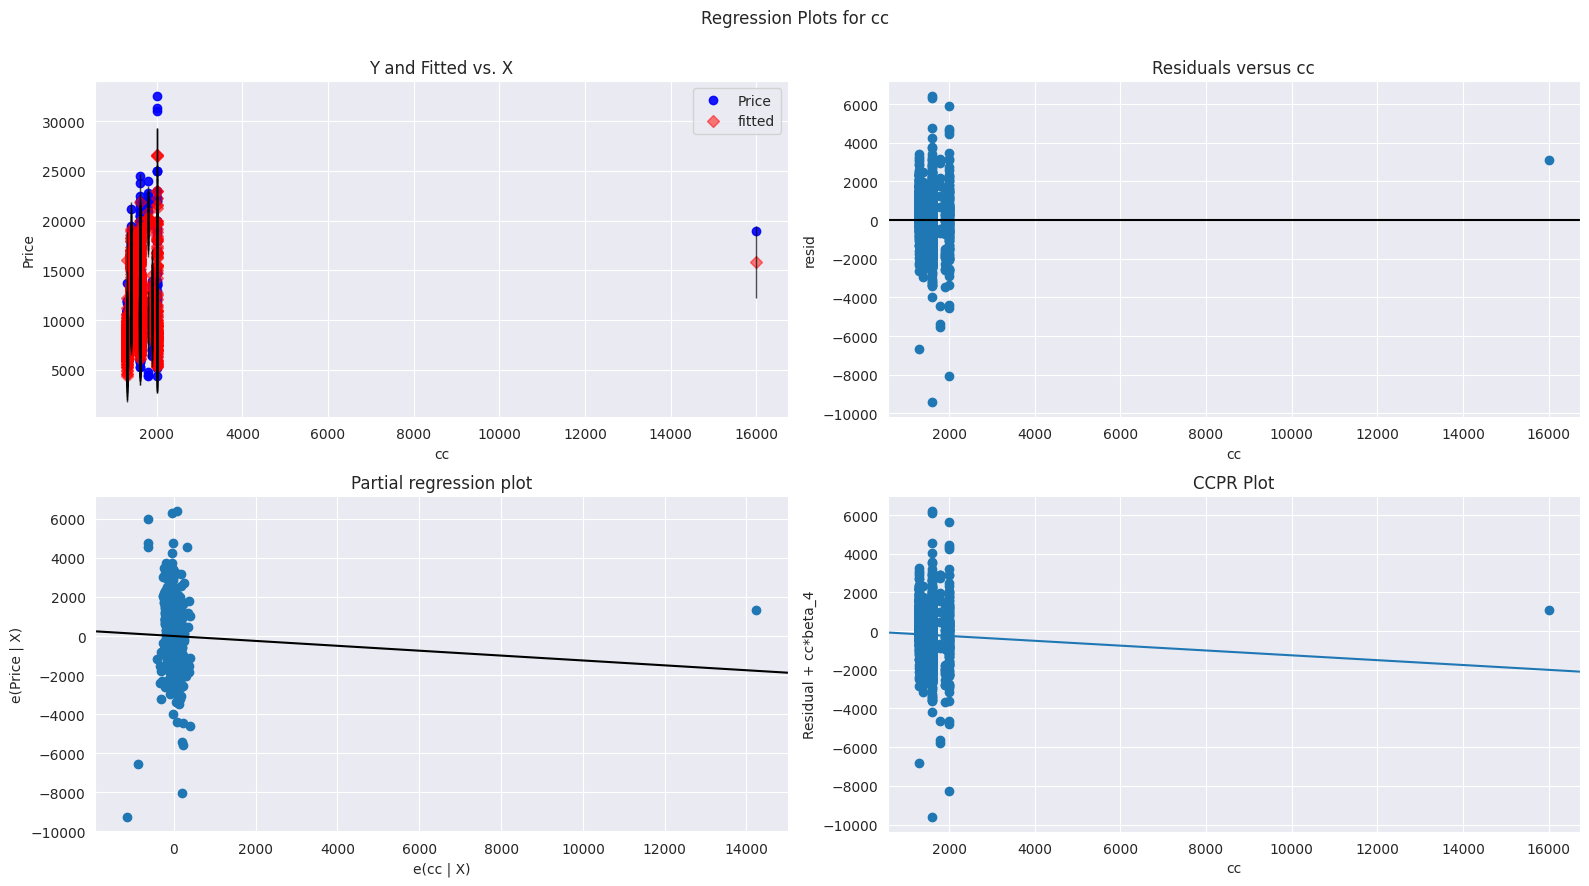

In [302]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'cc', fig=fig)
plt.show()

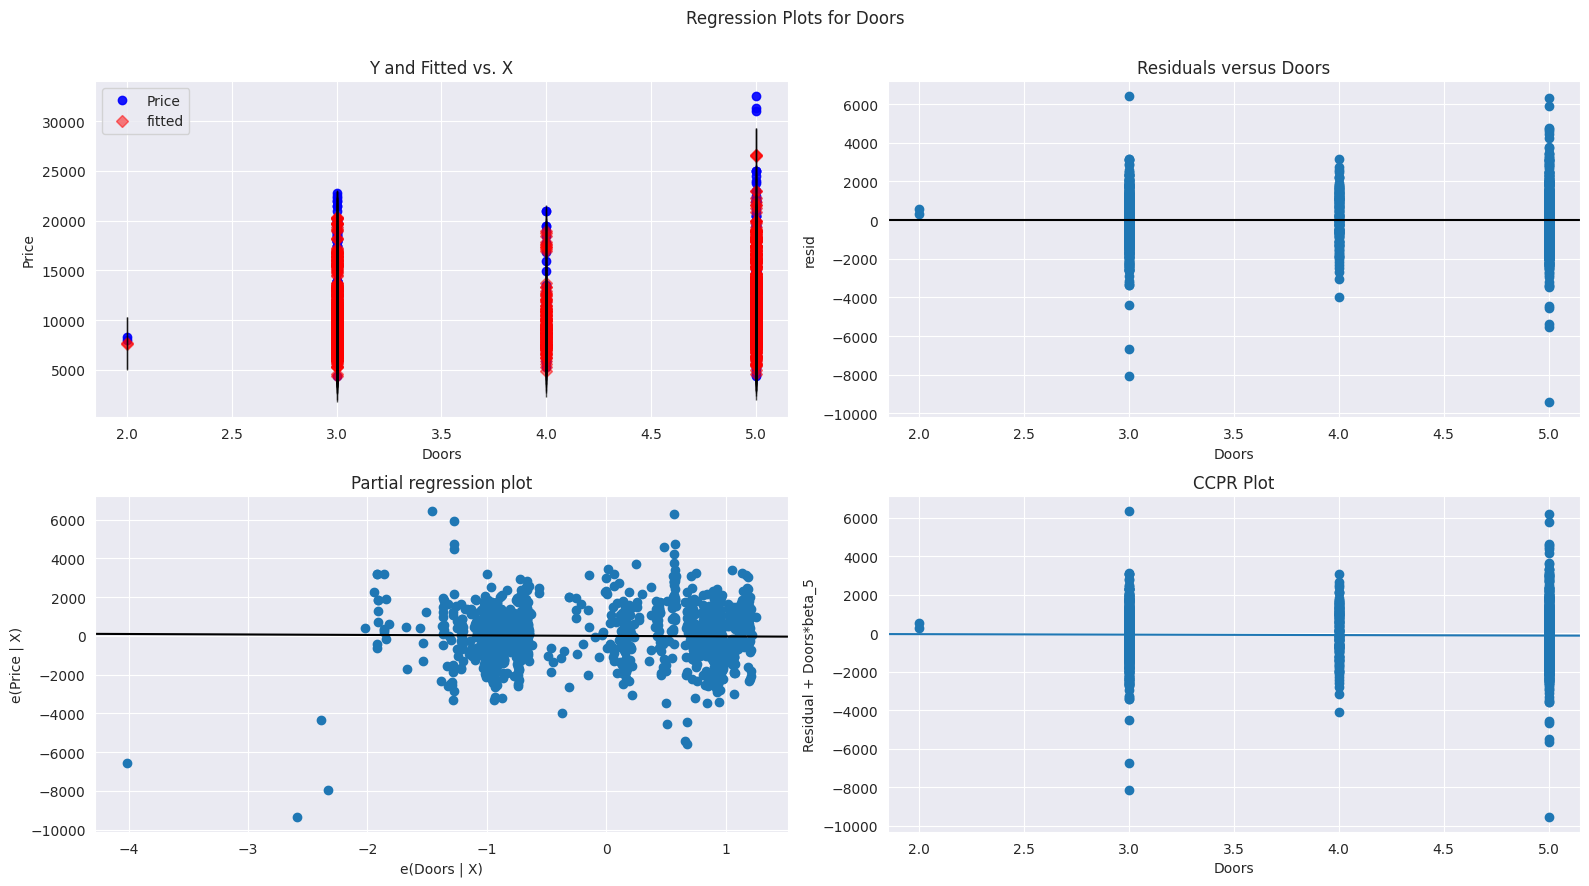

In [303]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Doors', fig=fig)
plt.show()

## Predicting values from Model using same dataset

In [304]:
x = dataframe[['Age_08_04','KM','HP','cc','Doors','Quarterly_Tax','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age_08_04','KM','HP','cc','Doors','Quarterly_Tax','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(Final_model.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[-7586466.28976381],
       [-7649862.98171134],
       [-7727941.11503696],
       ...,
       [-8897840.97138391],
       [-8876690.11822939],
       [-8855542.67257916]])

In [305]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

8485989.978583783

In [306]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age_08_04'] = dataframe.Age_08_04
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['cc'] = dataframe.cc
predicted['Quarterly_Tax'] = dataframe.Quarterly_Tax
predicted['Doors'] = dataframe.Doors
predicted

,Predicted_Price,Price,Age_08_04,KM,Weight,HP,cc,Quarterly_Tax,Doors
0,-7.586466e+06,13750,23,72937,1165,90,2000,210,3
1,-7.649863e+06,14950,26,48000,1165,90,2000,210,3
2,-7.727941e+06,13750,30,38500,1170,90,2000,210,3
3,-7.770276e+06,12950,32,61000,1170,90,2000,210,3
4,-7.567195e+06,16900,27,94612,1245,90,2000,210,3
...,...,...,...,...,...,...,...,...,...
1325,-9.067026e+06,8450,80,23000,1015,86,1300,69,3
1326,-8.821414e+06,7500,69,20544,1025,86,1300,69,3
1327,-8.897841e+06,10845,72,19000,1015,86,1300,69,3
1328,-8.876690e+06,8500,71,17016,1015,86,1300,69,3


In [307]:
models={'Different_Models':['Raw_data_Model','After_Removing_Influencers','After_Log Transformation_Model','After_Cube-root_Transformation_Model','After_Sqaure_Root_Transformation_Model','Final_Model_without_Multicollinearity_Model'],
        'R_squared':[raw_data_model.rsquared,final_model.rsquared,log_transformed_model.rsquared,cbrt_transformed_model.rsquared,sqrt_transformed_model.rsquared,model_1.rsquared],
        'R_squared_adjusted':[raw_data_model.rsquared_adj,final_model.rsquared_adj,log_transformed_model.rsquared_adj,cbrt_transformed_model.rsquared_adj,sqrt_transformed_model.rsquared_adj,model_1.rsquared_adj],
       'RMSE':[np.sqrt(raw_data_model.mse_resid),np.sqrt(final_model.mse_resid),log_both_rmse,cube_root_both_rmse,square_root_both_rmse,rmse_linear]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data_Model,0.900224,0.899620,976.765873
1,After_Removing_Influencers,0.900376,0.899773,975.927140
2,After_Log Transformation_Model,0.767907,0.766855,1795.826559
3,After_Cube-root_Transformation_Model,0.857248,0.856384,1152.557795
4,After_Sqaure_Root_Transformation_Model,0.881555,0.880837,1010.897945
5,Final_Model_without_Multicollinearity_Model,0.900198,0.899670,973.489130


In [308]:
x_train.shape

(1064, 8)

In [309]:
#Linear Regression
reg_model = LinearRegression().fit(x_train, y_train)
print(reg_model.score(x_train, y_train),reg_model.score(x_test, y_test))

1.0 1.0


In [310]:
from sklearn.ensemble import GradientBoostingRegressor
gd_model = GradientBoostingRegressor(random_state=1).fit(x_train, y_train)
print(gd_model.score(x_train, y_train),gd_model.score(x_test, y_test))

0.9999983876037611 0.9999951160887111


In [311]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=1).fit(x_train, y_train)
print(rfr_model.score(x_train, y_train),rfr_model.score(x_test, y_test))

0.999995943096554 0.999990110170423


In [312]:
print('Linear Regression Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, reg_model.predict(x_test))))
print('Gradient Booster Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, gd_model.predict(x_test))))
print('Random Forest Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, rfr_model.predict(x_test))))

Linear Regression Root Mean Squared Error: 2.6304034691427485e-15
Gradient Booster Regressor Root Mean Squared Error: 0.002078604323510742
Random Forest Regressor Root Mean Squared Error: 0.002957892231593127
